In [1]:
import os
print(os.getpid())

898


In [59]:
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as plticker

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 35
import numpy as np
from pathlib import Path
import re
import json
import scipy
from math import log2
from statsmodels.sandbox.stats.multicomp import multipletests
from Bio import SeqIO

# Use autoreload to keep up-to-date version of custom packages
import sys
sys.path.insert(0, '../src')
%load_ext autoreload
%aimport mwTools
%aimport cterminal
%aimport analysis_COG_enrichment
%autoreload 1

from importlib import reload
reload(cterminal)
from cterminal import *
from mwTools.bio import read_assemblySummary_file
from analysis_COG_enrichment import enrichment_analysis_cterminal_subset
reload(mwTools.stats)
from mwTools.stats import multiple_category_test
from mwTools.stats import pvalueAnnotation
from mwTools.paths import p

p = p()
print(p.rootPath)
rootPath = p.rootPath
cterminalPath = p.cterminalPath
refSeqPath = p.refSeqPath
taxonomyPath = p.taxonomyPath
phylaPath = p.phylaPath
entrezGenePath = p.entrezGenePath
OMAPath = p.OMAPath
eggNOGPath = p.eggNOGPath
NCBI_COG_path = p.NCBI_COG_path
analysisEggnogPath = p.analysisEggnogPath
analysisCtermDataPath = p.analysisCtermDataPath
analysisCtermPlotsPath = p.analysisCtermPlotsPath
analysisAbundancePath = p.analysisAbundancePath
paxdbPath = p.paxdbPath

print(len(aaTable))
sns.set_style("whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/users/lserrano/mweber
20


In [60]:
from cterminal import aaTable
aaTable

['R',
 'K',
 'H',
 'D',
 'E',
 'S',
 'T',
 'N',
 'Q',
 'C',
 'G',
 'P',
 'A',
 'V',
 'I',
 'L',
 'M',
 'F',
 'W',
 'Y']

In [101]:
from importlib import reload
reload(mwTools.bio)
from mwTools.bio import convert_df_to_fasta
from matplotlib_options import set_fontsize_paper, set_fontsize_screen

In [62]:
analysisAbundancePath

PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Protein_abundance')

## Import protein abundance database

### PaxDb

We import the protein abundance from the PaxDb database.

See [@Wang2012;@Wang2015d].

In [24]:
assemblySummaryRepDf = read_assemblySummary_file(str(Path(refSeqPath) / 'assembly_summary_refseq.txt'))
assemblySummaryRepDf

Nb of genomes in RefSeq database: 75064
Nb of genomes in RefSeq database, representative or reference genomes: 6165
Nb of genomes in RefSeq database, after filtering out contigs: 1773


,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,version_status,assembly_level,release_type,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,compressedGenomeFilename
assembly_accession,,,,,,,,,,,,,,,,,,,,,
GCF_000002515.2,PRJNA12377,SAMEA3138170,NaN,representative genome,28985,28985,Kluyveromyces lactis,strain=NRRL Y-1140,NaN,latest,Complete Genome,Major,Full,2004/07/02,ASM251v1,Genolevures Consortium,GCA_000002515.1,different,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000002515.2_ASM251v1_genomic.gbff.gz
GCF_000002725.2,PRJNA15564,SAMEA3138173,NaN,representative genome,347515,5664,Leishmania major strain Friedlin,strain=Friedlin,NaN,latest,Complete Genome,Major,Full,2011/02/14,ASM272v2,Friedlin Consortium,GCA_000002725.2,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000002725.2_ASM272v2_genomic.gbff.gz
GCF_000002985.6,PRJNA158,SAMEA3138177,NaN,reference genome,6239,6239,Caenorhabditis elegans,strain=Bristol N2,NaN,latest,Complete Genome,Major,Full,2013/02/07,WBcel235,C. elegans Sequencing Consortium,GCA_000002985.3,different,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000002985.6_WBcel235_genomic.gbff.gz
GCF_000005825.2,PRJNA224116,SAMN02603086,NaN,representative genome,398511,79885,Bacillus pseudofirmus OF4,strain=OF4,NaN,latest,Complete Genome,Major,Full,2010/12/15,ASM582v2,NaN,GCA_000005825.2,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000005825.2_ASM582v2_genomic.gbff.gz
GCF_000005845.2,PRJNA57779,SAMN02604091,NaN,reference genome,511145,562,Escherichia coli str. K-12 substr. MG1655,strain=K-12 substr. MG1655,NaN,latest,Complete Genome,Major,Full,2013/09/26,ASM584v2,Univ. Wisconsin,GCA_000005845.2,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000005845.2_ASM584v2_genomic.gbff.gz
GCF_000006175.1,PRJNA224116,SAMN00000040,NaN,representative genome,456320,2188,Methanococcus voltae A3,strain=A3,NaN,latest,Complete Genome,Major,Full,2010/06/03,ASM617v2,NaN,GCA_000006175.2,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000006175.1_ASM617v2_genomic.gbff.gz
GCF_000006605.1,PRJNA224116,SAMEA3283089,NaN,representative genome,306537,38289,Corynebacterium jeikeium K411,strain=K411 = NCTC 11915,NaN,latest,Complete Genome,Major,Full,2005/06/27,ASM660v1,NaN,GCA_000006605.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000006605.1_ASM660v1_genomic.gbff.gz
GCF_000006685.1,PRJNA224116,SAMN02603994,NaN,representative genome,243161,83560,Chlamydia muridarum str. Nigg,strain=Nigg,NaN,latest,Complete Genome,Major,Full,2003/03/26,ASM668v1,NaN,GCA_000006685.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000006685.1_ASM668v1_genomic.gbff.gz
GCF_000006725.1,PRJNA224116,SAMN02603773,NaN,representative genome,160492,2371,Xylella fastidiosa 9a5c,NaN,NaN,latest,Complete Genome,Major,Full,2004/06/04,ASM672v1,NaN,GCA_000006725.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000006725.1_ASM672v1_genomic.gbff.gz


In [25]:
assemblySummaryRepDf[assemblySummaryRepDf['organism_name'].str.contains('elegans')]

,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,version_status,assembly_level,release_type,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,compressedGenomeFilename
assembly_accession,,,,,,,,,,,,,,,,,,,,,
GCF_000002985.6,PRJNA158,SAMEA3138177,NaN,reference genome,6239,6239,Caenorhabditis elegans,strain=Bristol N2,NaN,latest,Complete Genome,Major,Full,2013/02/07,WBcel235,C. elegans Sequencing Consortium,GCA_000002985.3,different,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000002985.6_WBcel235_genomic.gbff.gz


In [26]:
print(len(assemblySummaryRepDf))
assemblySummaryRepDf = assemblySummaryRepDf[assemblySummaryRepDf['organism_name'] != 'Caenorhabditis elegans']
print(len(assemblySummaryRepDf))

1773
1772


In [11]:
paxTaxaIdList = list((paxdbPath / 'paxdb-abundance-files-v4.1').glob('*'))

In [12]:
paxTaxaIdList = [int(p.name) for p in paxTaxaIdList if re.search(r'^\d+', p.name)]
paxTaxaIdList[:5]

[9823, 260799, 7227, 7955, 214684]

In [15]:
print(len(paxTaxaIdList))

56


Select all bacterial organisms from PaxDb database that are also in the RefSeq database, based on NCBI taxa id.

In [ ]:
paxTaxaIdList = [taxa for taxa in paxTaxaIdList if taxa in assemblySummaryRepDf.taxid.tolist()]
print(len(paxTaxaIdList))

In [26]:
paxDfList = []
matchesList = []

for taxid in paxTaxaIdList[:]:
#     taxid = 511145
    taxPath = paxdbPath / 'paxdb-abundance-files-v4.1' / str(taxid)
    fileList = list(taxPath.glob('{}*'.format(taxid)))
    if len(fileList) == 0:
        print("Error, no file in directory")
    elif len(fileList) == 1:
        file = fileList[0]
    else:
        print("fileList:")
        [print(str(file)) for file in fileList]
        # there are some organisms for which we have both WHOLE_ORGANISM-integrated version
        # and EMBRYO-integrated... so choose the first one when possible.
        matches = [f for f in fileList if re.match('{}-WHOLE_ORGANISM-integrated'.format(taxid), f.name)]
        if len(matches) > 0:
            file = matches[0]
            matchesList.append(file.name)
        else:
            matches = [f for f in fileList if re.match('{}.*-integrated\.txt'.format(taxid), f.name)]
            if len(matches) > 0:
                file = matches[0]
                matchesList.append(file.name)
            else:
                raise ValueError("ERROR")
        
    paxDf = pd.read_table(file, header=11)
    paxDf['taxid'] = taxid
    paxDfList.append(paxDf)
    print(taxid, file)
    
paxDf = pd.concat(paxDfList)

9823 /users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/9823/9823-Pig_PeptideAtlas_2011-08_Ens62.txt
260799 /users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/260799/260799-GPM_201408.txt
fileList:
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/7227/7227-GPM_201408.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/7227/7227-fruitFly1_normalEmbryo_PRIDE.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/7227/7227-fruitFly2_earlyEmbryoCell_PRIDE.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/7227/7227-drosophila.peptides_Brunner_2007.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/7227/7227-WHOLE_ORGANISM-integrated.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/7227/7227-Drosophila_2011-09_Ens62.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/7227/7227-Drosophila_melanogaster_SC_biomart_31126_O_BTO0001489wholebo

243159 /users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/243159/243159-WHOLE_ORGANISM-integrated.txt
fileList:
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/3702/3702-SHOOT-integrated.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/3702/3702-Arabidopsis_pollen_Grobei_2009_GenomeRes.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/3702/3702-Arabidopsis_silique_Baerenfaller_2011_IntegrBiol.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/3702/3702-6.2JasmonateControls_woundedLeaves.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/3702/3702-arabidopsis1c_cotyledon_Baerenfaller_PRIDE.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/3702/3702-arabidopsis1a_carpel_Baerenfaller_PRIDE.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/3702/3702-arabidopsis1h_pollen_Baerenfaller_PRIDE.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abu

fileList:
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/10090/10090-Kidney_cortex_geiger_2013.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/10090/10090-Stomach_geiger_2013.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/10090/10090-White_fat_geiger_2013.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/10090/10090-mouse_haploidGermCells_Guo_2010_JProteome.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/10090/10090-Brain_medulla_geiger_2013.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/10090/10090-mouse_pancreas_F.Waanders2009_PNAs_combine.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/10090/10090-mouse_heart_kislinger2006_cell.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/10090/10090-Mouse_lung_Huttlin_cell2010.csv.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/10090/10090-Heart_geiger_2

99287 /users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/99287/99287-WHOLE_ORGANISM-integrated.txt
122586 /users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/122586/122586-GPM_201408.txt
fileList:
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/64091/64091-PA_201308.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/64091/64091-HalobacteriumBuild_Mar2008.peptides.new.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/64091/64091-GPM_201408.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/64091/64091-WHOLE_ORGANISM-integrated.txt
64091 /users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/64091/64091-WHOLE_ORGANISM-integrated.txt
fileList:
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/10116/10116-GPM_2012_09_Rattus_norvegicus.txt
/users/lserrano/mweber/Databases/paxdb/paxdb-abundance-files-v4.1/10116/10116-WHOLE_ORGANISM-integrated.txt
/users/lserrano

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



In [27]:
matchesList

['7227-WHOLE_ORGANISM-integrated.txt',
 '7955-WHOLE_ORGANISM-integrated.txt',
 '214684-WHOLE_ORGANISM-integrated.txt',
 '9031-WHOLE_ORGANISM-integrated.txt',
 '5833-WHOLE_ORGANISM-integrated.txt',
 '224308-WHOLE_ORGANISM-integrated.txt',
 '4896-WHOLE_ORGANISM-integrated.txt',
 '9606-WHOLE_ORGANISM-integrated.txt',
 '243159-WHOLE_ORGANISM-integrated.txt',
 '3702-WHOLE_ORGANISM-integrated.txt',
 '7460-WHOLE_ORGANISM-integrated.txt',
 '267671-WHOLE_ORGANISM-integrated.txt',
 '882-WHOLE_ORGANISM-integrated.txt',
 '4932-WHOLE_ORGANISM-integrated.txt',
 '83332-WHOLE_ORGANISM-integrated.txt',
 '85962-WHOLE_ORGANISM-integrated.txt',
 '10090-WHOLE_ORGANISM-integrated.txt',
 '9913-WHOLE_ORGANISM-integrated.txt',
 '449447-WHOLE_ORGANISM-integrated.txt',
 '272623-WHOLE_ORGANISM-integrated.txt',
 '99287-WHOLE_ORGANISM-integrated.txt',
 '64091-WHOLE_ORGANISM-integrated.txt',
 '10116-WHOLE_ORGANISM-integrated.txt',
 '6239-WHOLE_ORGANISM-integrated.txt',
 '4577-LEAF-integrated.txt',
 '353153-WHOLE_ORG

We have to map the protein ids in the PaxDb to the RefSeq database. We will match the protein sequences provided in the PaxDb to the protein sequences in NCBI.

In [28]:
paxDf.tail()

,#internal_id,abundance,raw_spectral_count,string_external_id,taxid
4091,6881571,0.275,NaN,511145.b0770,511145
4092,6882309,0.030,NaN,511145.b1558,511145
4093,6883673,79.300,NaN,511145.b3055,511145
4094,6883940,323.000,NaN,511145.b3347,511145
4095,6884939,52.700,NaN,511145.b4506,511145


In [29]:
# with open(str(paxdbPath / 'paxdb-protein-sequences.fa')) as fasta_file:
#     identifiers = []
#     lengths = []
#     sequences = []
#     for title, sequence in SimpleFastaParser(fasta_file):
#         identifiers.append(title.split(None, 1)[0])  # First word is ID
#         lengths.append(len(sequence))
#         sequences.append(sequence)

In [30]:
import Bio.SeqIO

# Bio.SeqIO.parse()
identifiers = []
lengths = []
sequences = []
taxas = []

for f in (paxdbPath / 'paxdb-protein-sequences-v4.1').glob('*'):
    taxa = int(re.search(r'fasta\.v10\.5\.(\d+)\.fa', f.name).group(1))
    for record in Bio.SeqIO.parse(f, 'fasta'):
        identifiers.append(record.id)
        sequences.append(str(record.seq))
        lengths.append(len(record.seq))
        taxas.append(taxa)

In [31]:
sequences[:5]

['MTENEQIFWNRVLELAQSQLKQATYEFFVHDARLLKVDKHIATIYLDQMKELFWEKNLKDVILTAGFEVYNAQISVDYVFEEDLMIEQNQTKINQKPKQQALNSLPTVTSDLNSKYSFENFIQGDENRWAVAASIAVANTPGTTYNPLFIWGGPGLGKTHLLNAIGNSVLLENPNARIKYITAENFINEFVIHIRLDTMDELKEKFRNLDLLLIDDIQSLAKKTLSGTQEEFFNTFNALHNNNKQIVLTSDRTPDHLNDLEDRLVTRFKWGLTVNITPPDFETRVAILTNKIQEYNFIFPQDTIEYLAGQFDSNVRDLEGALKDISLVANFKQIDTITVDIAAEAIRARKQDGPKMTVIPIEEIQAQVGKFYGVTVKEIKATKRTQNIVLARQVAMFLAREMTDNSLPKIGKEFGGRDHSTVLHAYNKIKNMISQDESLRIEIETIKNKIK',
 'MIQFSINRTLFIHALNTTKRAISTKNAIPILSSIKIEVTSTGVTLTGSNGQISIENTIPVSNENAGLLITSPGAILLEASFFINIISSLPDISINVKEIEQHQVVLTSGKSEITLKGKDVDQYPRLQEVSTENPLILKTKLLKSIIAETAFAASLQESRPILTGVHIVLSNHKDFKAVATDSHRMSQRLITLDNTSADFDVVIPSKSLREFSAVFTDDIETVEVFFSPSQILFRSEHISFYTRLLEGNYPDTDRLLMTEFETEVVFNTQSLRHAMERAFLISNATQNGTVKLEITQNHISAHVNSPEVGKVNEDLDIVSQSGSDLTISFNPTYLIESLKAIKSETVKIHFLSPVRPFTLTPGDEEESFIQLITPVRTN',
 'MYQIGSFVEMKKPHACVIKETGKKANQWKVLRVGADIKIQCTNCQHVIMMSRYDFERKLKKVLQP',
 'MALTAGIVGLPNVGKSTLFNAITKAGAEAANYPFATIDPNVGMVEVPDERLQKLTELITPKKTVPTTFEFTDIAGIVKGASRGEGLGNK

In [32]:
identifiers[:5]

['SPy_0002', 'SPy_0003', 'SPy_0004', 'SPy_0006', 'SPy_0007']

In [33]:
taxas[:5]

[160490, 160490, 160490, 160490, 160490]

Some identifiers contain also the taxid inside the string, we have to correct them. However, it seems that they are correct, for some species they include the taxid...

In [34]:
iList = [s for s in identifiers if re.search(r'^\d+\..+', s)]
len(iList)

12450

In [35]:
iList[:5]

['5821.PBANKA_000010',
 '5821.PBANKA_000020',
 '5821.PBANKA_000030',
 '5821.PBANKA_000040',
 '5821.PBANKA_000050']

In [36]:
iList[5000:5005]

['13113.m00247',
 '13113.m00248',
 '13113.m00249',
 '13113.m00250',
 '13113.m00251']

In [37]:
iList[-5:]

['352914.XP_731466.1',
 '352914.XP_731467.1',
 '352914.XP_731468.1',
 '352914.XP_731469.1',
 '352914.XP_731470.1']

In [38]:
identifiers2 = [s if not re.search(r'^\d+\..+', s) else re.sub(r'^\d+\.(.+)', r'\1', s) for s in identifiers]
len(identifiers2)

696170

In [39]:
paxProtSeqDf = pd.DataFrame(data={'seq':sequences, 'seq_length':lengths, 'taxa_id':taxas}, index=identifiers)
print(len(paxProtSeqDf))
paxProtSeqDf.head()

696170


,seq,seq_length,taxa_id
SPy_0002,MTENEQIFWNRVLELAQSQLKQATYEFFVHDARLLKVDKHIATIYL...,451,160490
SPy_0003,MIQFSINRTLFIHALNTTKRAISTKNAIPILSSIKIEVTSTGVTLT...,378,160490
SPy_0004,MYQIGSFVEMKKPHACVIKETGKKANQWKVLRVGADIKIQCTNCQH...,65,160490
SPy_0006,MALTAGIVGLPNVGKSTLFNAITKAGAEAANYPFATIDPNVGMVEV...,371,160490
SPy_0007,MVKMIVGLGNPGSKYEKTKHNIGFMAIDNIVKNLDVTFTDDKNFKA...,189,160490


In [40]:
pd.isnull(paxProtSeqDf.index).sum()

0

In [41]:
(paxProtSeqDf.index == '').sum()

0

In [42]:
paxProtSeqDf.index.duplicated().sum()

0

In [43]:
paxDf = paxDf.set_index('string_external_id')
paxDf.index.name = 'id'

In [44]:
paxDf.head()

,#internal_id,abundance,raw_spectral_count,taxid
id,,,,
9823.ENSSSCP00000002701,2018228,2.93,8.0,9823
9823.ENSSSCP00000021442,2031626,1.06,2.0,9823
9823.ENSSSCP00000012076,2024694,408.00,411.0,9823
9823.ENSSSCP00000024202,2034098,859.00,2973.0,9823
9823.ENSSSCP00000000629,2017036,8.92,16.0,9823


In [45]:
paxDf2 = paxDf.join(paxProtSeqDf, how='left')
paxDf2.head()

,#internal_id,abundance,raw_spectral_count,taxid,seq,seq_length,taxa_id
id,,,,,,,
9823.ENSSSCP00000002701,2018228,2.93,8.0,9823,NaN,NaN,NaN
9823.ENSSSCP00000021442,2031626,1.06,2.0,9823,NaN,NaN,NaN
9823.ENSSSCP00000012076,2024694,408.00,411.0,9823,NaN,NaN,NaN
9823.ENSSSCP00000024202,2034098,859.00,2973.0,9823,NaN,NaN,NaN
9823.ENSSSCP00000000629,2017036,8.92,16.0,9823,NaN,NaN,NaN


Some sequences have not been match, because their id contains also the taxaid.

In [46]:
paxDf2.seq.isnull().sum()

275769

In [47]:
paxDf2[paxDf2.seq.isnull()].head()

,#internal_id,abundance,raw_spectral_count,taxid,seq,seq_length,taxa_id
id,,,,,,,
9823.ENSSSCP00000002701,2018228,2.93,8.0,9823,NaN,NaN,NaN
9823.ENSSSCP00000021442,2031626,1.06,2.0,9823,NaN,NaN,NaN
9823.ENSSSCP00000012076,2024694,408.00,411.0,9823,NaN,NaN,NaN
9823.ENSSSCP00000024202,2034098,859.00,2973.0,9823,NaN,NaN,NaN
9823.ENSSSCP00000000629,2017036,8.92,16.0,9823,NaN,NaN,NaN


In [48]:
unmatchedIds = list(paxDf2[paxDf2.seq.isnull()].index)
unmatchedIds

['9823.ENSSSCP00000002701',
 '9823.ENSSSCP00000021442',
 '9823.ENSSSCP00000012076',
 '9823.ENSSSCP00000024202',
 '9823.ENSSSCP00000000629',
 '9823.ENSSSCP00000005765',
 '9823.ENSSSCP00000010107',
 '9823.ENSSSCP00000012817',
 '9823.ENSSSCP00000018389',
 '9823.ENSSSCP00000000258',
 '9823.ENSSSCP00000016552',
 '9823.ENSSSCP00000017936',
 '9823.ENSSSCP00000027630',
 '9823.ENSSSCP00000011445',
 '9823.ENSSSCP00000014647',
 '9823.ENSSSCP00000004025',
 '9823.ENSSSCP00000017114',
 '9823.ENSSSCP00000009008',
 '9823.ENSSSCP00000020415',
 '9823.ENSSSCP00000000448',
 '9823.ENSSSCP00000021926',
 '9823.ENSSSCP00000020660',
 '9823.ENSSSCP00000007115',
 '9823.ENSSSCP00000023940',
 '9823.ENSSSCP00000025441',
 '9823.ENSSSCP00000005884',
 '9823.ENSSSCP00000011212',
 '9823.ENSSSCP00000022856',
 '9823.ENSSSCP00000011891',
 '9823.ENSSSCP00000004246',
 '9823.ENSSSCP00000005522',
 '9823.ENSSSCP00000016556',
 '9823.ENSSSCP00000008760',
 '9823.ENSSSCP00000007354',
 '9823.ENSSSCP00000027905',
 '9823.ENSSSCP000000

In [49]:
unmatchedIdDf = [re.search(r'^(\d+)\.(.+)', s) for s in unmatchedIds]
unmatchedIdDf = [{'taxid':int(m.group(1)), 'id_original':m.string, 'id':m.group(2)} for m in unmatchedIdDf]
unmatchedIdDf = pd.DataFrame(unmatchedIdDf)
unmatchedIdDf.head(5)

,id,id_original,taxid
0,ENSSSCP00000002701,9823.ENSSSCP00000002701,9823
1,ENSSSCP00000021442,9823.ENSSSCP00000021442,9823
2,ENSSSCP00000012076,9823.ENSSSCP00000012076,9823
3,ENSSSCP00000024202,9823.ENSSSCP00000024202,9823
4,ENSSSCP00000000629,9823.ENSSSCP00000000629,9823


All these ids are indeed in the protein sequences fasta ids. So we will convert them.

In [50]:
unmatchedIdDf['id'].map(lambda x: x in paxProtSeqDf.index).head()

0    True
1    True
2    True
3    True
4    True
Name: id, dtype: bool

In [51]:
mappingDict = unmatchedIdDf.set_index('id_original')['id'].to_dict()
mappingDict

{'9823.ENSSSCP00000002701': 'ENSSSCP00000002701',
 '9823.ENSSSCP00000021442': 'ENSSSCP00000021442',
 '9823.ENSSSCP00000012076': 'ENSSSCP00000012076',
 '9823.ENSSSCP00000024202': 'ENSSSCP00000024202',
 '9823.ENSSSCP00000000629': 'ENSSSCP00000000629',
 '9823.ENSSSCP00000005765': 'ENSSSCP00000005765',
 '9823.ENSSSCP00000010107': 'ENSSSCP00000010107',
 '9823.ENSSSCP00000012817': 'ENSSSCP00000012817',
 '9823.ENSSSCP00000018389': 'ENSSSCP00000018389',
 '9823.ENSSSCP00000000258': 'ENSSSCP00000000258',
 '9823.ENSSSCP00000016552': 'ENSSSCP00000016552',
 '9823.ENSSSCP00000017936': 'ENSSSCP00000017936',
 '9823.ENSSSCP00000027630': 'ENSSSCP00000027630',
 '9823.ENSSSCP00000011445': 'ENSSSCP00000011445',
 '9823.ENSSSCP00000014647': 'ENSSSCP00000014647',
 '9823.ENSSSCP00000004025': 'ENSSSCP00000004025',
 '9823.ENSSSCP00000017114': 'ENSSSCP00000017114',
 '9823.ENSSSCP00000009008': 'ENSSSCP00000009008',
 '9823.ENSSSCP00000020415': 'ENSSSCP00000020415',
 '9823.ENSSSCP00000000448': 'ENSSSCP00000000448',


In [52]:
paxDf.index = paxDf.index.map(lambda x: mappingDict[x] if x in mappingDict.keys() else x)

In [53]:
paxDf.head()

,#internal_id,abundance,raw_spectral_count,taxid
id,,,,
ENSSSCP00000002701,2018228,2.93,8.0,9823
ENSSSCP00000021442,2031626,1.06,2.0,9823
ENSSSCP00000012076,2024694,408.00,411.0,9823
ENSSSCP00000024202,2034098,859.00,2973.0,9823
ENSSSCP00000000629,2017036,8.92,16.0,9823


In [54]:
paxDf2 = paxDf.join(paxProtSeqDf, how='left')
paxDf2.head()

,#internal_id,abundance,raw_spectral_count,taxid,seq,seq_length,taxa_id
id,,,,,,,
ENSSSCP00000002701,2018228,2.93,8.0,9823,MAAPEWDWFQREELIGQISDIRVQNLQVERENVQKRTFTRWVNLHL...,1007,9823
ENSSSCP00000021442,2031626,1.06,2.0,9823,LRVSRRSPRGPVLLARLSGLRRGACAPAMELPRCFALELPGCTLAH...,450,9823
ENSSSCP00000012076,2024694,408.00,411.0,9823,MAPKKPEPKKDDAKAAAKAAPAPAPAPAPAPEPPKEPEFDASKIKI...,197,9823
ENSSSCP00000024202,2034098,859.00,2973.0,9823,MAERKQSGKAAEDEEVPAFFKNLGSGSPKPRQKFCGMFCPVEGSSE...,677,9823
ENSSSCP00000000629,2017036,8.92,16.0,9823,YYFHSRGLSKYLSWISKVQVNQPAVLRRAEQIQARRPVKKEWQVAW...,318,9823


All sequence ids are matched now.

In [55]:
paxDf2.seq.isnull().sum()

0

In [57]:
paxDf2.to_csv(paxdbPath / 'paxDf2.csv')

Next, we have to convert the paxDf to a dataframe compatible with our c-terminal analysis pipeline.

## Merge paxDb with NCBI custom database

In [61]:
assemblySummaryPaxDf = assemblySummaryRepDf.reset_index().set_index('taxid').loc[paxTaxaIdList]
print(len(assemblySummaryPaxDf))
assemblySummaryPaxDf.head(2)

24


,assembly_accession,bioproject,biosample,wgs_master,refseq_category,species_taxid,organism_name,infraspecific_name,isolate,version_status,assembly_level,release_type,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,compressedGenomeFilename
taxid,,,,,,,,,,,,,,,,,,,,,
260799,GCF_000008165.1,PRJNA58091,SAMN02598266,NaN,reference genome,1392,Bacillus anthracis str. Sterne,strain=Sterne,NaN,latest,Complete Genome,Major,Full,2004/06/24,ASM816v1,NaN,GCA_000008165.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000008165.1_ASM816v1_genomic.gbff.gz
226186,GCF_000011065.1,PRJNA62913,SAMN02604314,NaN,reference genome,818,Bacteroides thetaiotaomicron VPI-5482,strain=VPI-5482,NaN,latest,Complete Genome,Major,Full,2003/03/28,ASM1106v1,NaN,GCA_000011065.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,GCF_000011065.1_ASM1106v1_genomic.gbff.gz


In [62]:
assemblySummaryPaxDf['organism_name'].tolist()

['Bacillus anthracis str. Sterne',
 'Bacteroides thetaiotaomicron VPI-5482',
 'Bacillus subtilis subsp. subtilis str. 168',
 'Shewanella oneidensis MR-1',
 'Thermococcus gammatolerans EJ3',
 'Legionella pneumophila subsp. pneumophila str. Philadelphia 1',
 'Acidithiobacillus ferrooxidans ATCC 23270',
 'Bartonella henselae str. Houston-1',
 'Desulfovibrio vulgaris str. Hildenborough',
 'Mycobacterium tuberculosis H37Rv',
 'Helicobacter pylori 26695',
 'Synechocystis sp. PCC 6803',
 'Microcystis aeruginosa NIES-843',
 'Listeria monocytogenes EGD-e',
 'Lactococcus lactis subsp. lactis Il1403',
 'Salmonella enterica subsp. enterica serovar Typhimurium str. LT2',
 'Neisseria meningitidis MC58',
 'Yersinia pestis CO92',
 'Deinococcus deserti VCD115',
 'Streptococcus pyogenes M1 GAS',
 'Shigella flexneri 2a str. 301',
 'Pseudomonas aeruginosa PAO1',
 'Campylobacter jejuni subsp. jejuni NCTC 11168 = ATCC 700819',
 'Escherichia coli str. K-12 substr. MG1655']

In [72]:
assemblyAccessionList = assemblySummaryPaxDf.assembly_accession.unique()
print(len(assemblyAccessionList))
assemblyAccessionList

24


array(['GCF_000008165.1', 'GCF_000011065.1', 'GCF_000009045.1',
       'GCF_000146165.2', 'GCF_000022365.1', 'GCF_000008485.1',
       'GCF_000021485.1', 'GCF_000046705.1', 'GCF_000195755.1',
       'GCF_000195955.2', 'GCF_000008525.1', 'GCF_000009725.1',
       'GCF_000010625.1', 'GCF_000196035.1', 'GCF_000006865.1',
       'GCF_000006945.1', 'GCF_000008805.1', 'GCF_000009065.1',
       'GCF_000020685.1', 'GCF_000006785.2', 'GCF_000006925.2',
       'GCF_000006765.1', 'GCF_000009085.1', 'GCF_000005845.2'],
      dtype=object)

We can call the `full_analysis_multispecies` method to import and gather the protein sequence dataframe from NCBI genome files.

In [64]:
assemblyAccessionList

array(['GCF_000008165.1', 'GCF_000011065.1', 'GCF_000009045.1',
       'GCF_000146165.2', 'GCF_000022365.1', 'GCF_000008485.1',
       'GCF_000021485.1', 'GCF_000046705.1', 'GCF_000195755.1',
       'GCF_000195955.2', 'GCF_000008525.1', 'GCF_000009725.1',
       'GCF_000010625.1', 'GCF_000196035.1', 'GCF_000006865.1',
       'GCF_000006945.1', 'GCF_000008805.1', 'GCF_000009065.1',
       'GCF_000020685.1', 'GCF_000006785.2', 'GCF_000006925.2',
       'GCF_000006765.1', 'GCF_000009085.1', 'GCF_000005845.2'],
      dtype=object)

In [65]:
analysisAbundancePath

PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Protein_abundance')

In [ ]:
speciesSetName = 'paxDb'

multispeciesAllCDSDf_nr = \
    full_analysis_multispecies(refSeqFolder=str(refSeqPath),
                               dataSingleSpeciesFolder=str(analysisCtermDataPath),
                               dataSpeciesGroupFolder=str(analysisAbundancePath),
                               plotsFolder=str(analysisAbundancePath),
                               speciesSetName=speciesSetName,
                               chooseRandomGenomes=False,
                               nRandomGenomes=0,
                               assemblyAccessionList=assemblyAccessionList,
                               speciesList=[],
                               multispeciesAllCDSDf_nr=None,
                               dfFormatOutput='csv',
                               skipAnalysisExistingDataFiles=True,
                               skipStatisticsAnalysis=True,
                               method='allSeqDataframe',
                               skipClustering=True
                              )

In [ ]:
multispeciesAllCDSDf_nr = pd.read_csv((analysisCtermDataPath / 'paxDb' / 'paxDb_unclustered_multispeciesAllCDSDf_nr.csv'))

In [ ]:
len(multispeciesAllCDSDf_nr)

In [23]:
multispeciesAllCDSDf_nr.head(3)

,refSeqProteinId,proteinGI,species_name,genome_accession,DNASeq,stopCodon,DNA3UTRSeq,codonTableBio,proteinSeq
0,YP_027769.1,49184517,Bacillus anthracis str. Sterne,GCF_000008165.1,ATGCCCATTACGAATCGATTTTCTACCACCACTAACGGCGCACTTG...,TAA,ATGAAACAAAAAGAGATTGTAGTTTGGTTG,11.0,MPITNRFSTTTNGALAITGNTLGLSKISNQNRAGTIGAIGAFITTN...
1,YP_028469.1,49185217,Bacillus anthracis str. Sterne,GCF_000008165.1,ATGCCTAATAGTCAAAAGGTTCGTCATTCGTTATCATCTGCGCAGT...,TGA,CGAATCCATTTGAAAATGATAATTACACAT,11.0,MPNSQKVRHSLSSAQSGMWFAQQLDPLNPIYNTGEYVEINGNINQE...
2,YP_026734.1,49183482,Bacillus anthracis str. Sterne,GCF_000008165.1,ATGGTAGGAAGAATTAAGGGAATAACGATAGAGATTGGTGGAGAAA...,TGA,GTTTAACATTAGATGGTAAACCATTAAAAC,11.0,MVGRIKGITIEIGGETTGLQSALKDVNKRSSELSKELKDIERLLKF...


Add taxid column.

In [24]:
multispeciesAllCDSDf_nr2 = \
    pd.merge(multispeciesAllCDSDf_nr,
             assemblySummaryPaxDf.reset_index()[['taxid', 'assembly_accession']].rename(columns={'assembly_accession':'genome_accession'}),
             how='left', on='genome_accession')

In [86]:
paxDf3 = paxDf2.reset_index().rename(columns={'id':'pax_id', '#internal_id':'pax_internal_id', 'seq':'proteinSeq'})\
               .drop(['seq_length'], axis=1)
paxDf3.head(3)

,pax_id,pax_internal_id,abundance,raw_spectral_count,taxid,proteinSeq,taxa_id
0,BAS0510,4010784,53.70,54.0,260799,MGRKWNNIKDKKASKDANTSRIYAKFGREIYVAAKQGEPDPESNQA...,260799
1,BAS2507,4012762,64.20,116.0,260799,MKNTYQLQIPKELEQYRTILEESVKPYIKVAGTKAETTLFESKFGG...,260799
2,BAS2756,4013009,8.55,9.0,260799,MKKVIGAATATVFGLGAFTTTATAETIVTADVLNVREKPTTESKVV...,260799


Taxid and protein sequence together form a unique index for NCBI sequences.

In [138]:
multispeciesAllCDSDf_nr2.set_index(['taxid', 'proteinSeq']).index.is_unique

True

In [164]:
multispeciesAllCDSDf_nr2.set_index(['taxid', 'refSeqProteinId']).index.is_unique

True

This is not the case for paxDB sequences! We remove duplicated sequences with same exact abundance.

In [64]:
paxDf3.set_index(['taxid', 'proteinSeq']).index.is_unique

False

In [65]:
len(paxDf3) - len(paxDf3.drop_duplicates(subset=['taxid', 'proteinSeq', 'abundance']))

638

In [87]:
paxDf3 = paxDf3.drop_duplicates(subset=['taxid', 'proteinSeq', 'abundance'])

In [147]:
multispeciesAllCDSDf_nr3 = \
    pd.merge(multispeciesAllCDSDf_nr2.set_index(['taxid', 'proteinSeq']),
             paxDf3.set_index(['taxid', 'proteinSeq']),
             left_index=True, right_index=True, how='outer', indicator=True).reset_index()
multispeciesAllCDSDf_nr3.head(3)

,taxid,proteinSeq,refSeqProteinId,proteinGI,species_name,genome_accession,DNASeq,stopCodon,DNA3UTRSeq,codonTableBio,blastdb_prefix,blast_id,pax_id,pax_internal_id,abundance,raw_spectral_count,_merge
0,882,MAAAKNISALLLSVIVIGLLAVGGYVTFQDMSGPEVTLSPATDRVS...,YP_011068.1,46580260.0,Desulfovibrio vulgaris str. Hildenborough,GCF_000195755.1,ATGGCTGCCGCAAAAAACATCTCCGCTCTACTCCTCTCTGTCATCG...,TAG,CCTGCTTGTGATAGCAATGAAAAAGGCCGC,11.0,lcl,882_YP_011068.1,882.DVU1851,5458.0,402.0,NaN,both
1,882,MAADDHIEMEGVVEEALPGTLFRVVLENGHEVLAHLCGKMRKFRIR...,YP_011429.1,46580621.0,Desulfovibrio vulgaris str. Hildenborough,GCF_000195755.1,ATGGCAGCTGACGATCATATTGAAATGGAAGGCGTTGTTGAAGAGG...,TAG,GTCGCATCACCTCGCGTACAACGCATGACG,11.0,lcl,882_YP_011429.1,NaN,NaN,NaN,NaN,left_only
2,882,MAAEKLGARVRKYREDRGMSREQLSEAAGLTVEFIAALEEDNLYPS...,YP_012277.1,46581469.0,Desulfovibrio vulgaris str. Hildenborough,GCF_000195755.1,ATGGCCGCTGAAAAGCTTGGCGCGCGTGTGCGCAAGTACAGGGAAG...,TAG,GCCGGAGCGTCAGCATGGATACGTTCGCCA,11.0,lcl,882_YP_012277.1,882.DVU3066,6658.0,118.0,NaN,both


We have to remove some duplicates from multiple entries in paxDb of the same protein sequence but with different abundances. There are very few, so we just keep the first.

In [ ]:
print(len(multispeciesAllCDSDf_nr3))
multispeciesAllCDSDf_nr3.drop(
    multispeciesAllCDSDf_nr3[multispeciesAllCDSDf_nr3.duplicated(subset=['taxid', 'refSeqProteinId'], keep='last') &
                             (multispeciesAllCDSDf_nr3['_merge'] != 'right_only')
                            ].index,
    inplace=True)
print(len(multispeciesAllCDSDf_nr3))

In [178]:
multispeciesAllCDSDf_nr3.to_csv(str(analysisCtermDataPath / 'paxDb' / 'paxDb_multispeciesAllCDSDf_nr3.csv'))

In [288]:
multispeciesAllCDSDf_nr3 = pd.read_csv(str(analysisAbundancePath / 'paxDb_multispeciesAllCDSDf_nr3.csv'),
                                      index_col=0)

In [290]:
multispeciesAllCDSDf_nr3.set_index(['taxid', 'refSeqProteinId']).index.is_unique

False

In [291]:
print(len(multispeciesAllCDSDf_nr3))
multispeciesAllCDSDf_nr3['_merge'].value_counts()

94283


left_only     40618
both          39153
right_only    14512
Name: _merge, dtype: int64

By merging by taxid and protein sequence, we loose 14'512 protein that have annotated abundance. Probably the protein sequence does not match perfectly.

Nothing special about protein length of these missing proteins. Some of them are very short, maybe they are not annotated in the NCBI.

In [24]:
multispeciesAllCDSDf_nr3[multispeciesAllCDSDf_nr3['_merge'] == 'right_only'].proteinSeq.map(len).describe()

count    14512.000000
mean       437.384854
std        452.651865
min         14.000000
25%        196.000000
50%        344.000000
75%        529.000000
max      18562.000000
Name: proteinSeq, dtype: float64

In [25]:
seq = multispeciesAllCDSDf_nr3[multispeciesAllCDSDf_nr3['_merge'] == 'right_only'].iloc[1].proteinSeq
seq

'MSLVINHNMMAMNAAGNLSNSYGKLSTSVRRLSSGLRVGTAADDAAGLAIRELMRSDISALNQGVRNANDAISLIQTADGALGVIDEKLIRMKELAEQAATGTYTSDQRLIIDSEYQAMASEITRIANATDFNGLHLLNGNLSSDTHDGSGLQSTGKMKIHFGTANDSAEDYYYVQIGTSTASALGVGNQATAGSAGYTISTQSAAQQALVAIQNAIISKDNIRASLGALQNRLENTISNLRTQAENLQSAESRISDVDVSSEMTEFVRQQILTQSAVAMLSQANSLPRMAMQLLGG'

### BLAST pax-only sequences to NCBI sequences

The PaxDb aggregates several multiple databases and publications on proteomics. It is not clear exactly how the protein sequences are annotated, but I suspect that they directly use protein sequences from each imported database, such that there is no guarantee of uniformity in the protein sequence annotation.

From @Wang2012:
> Identifier Remapping and Spectral Counting—In PaxDb, each pro-
tein abundance data set is remapped to an up-to-date, consistently annotated version of the respective model-organism genome/pro- teome. The reference genomes are imported from the STRING data- base (54), which in its current version holds more than 1000 com- pletely sequenced genomes. Using the built-in synonym tables of STRING, source identifiers are first mapped to their respective genome loci, and from there to a single, “canonical” protein encoded at each locus. By design, PaxDb aggregates any splicing-specific abun- dance information at the gene locus level; splice-form-specific abun- dance information is currently not stored (because it is often under- sampled and not very informative at the high level of integration that PaxDb provides).

From @Wang2015d:
> PaxDb is purely a meta-resource–it does not currently accept user submissions. All its data are imported from primary proteomics databases or from publication sup- plements; the original search parameters, false discovery rates, and other technical settings are left unchanged.

So apparently all the protein sequences are mapped on the STRING genome database.

Build a BLAST local database with NCBI sequences.

In [14]:
multispeciesAllCDSDf_nr3 = pd.read_csv(str(analysisCtermDataPath / 'paxDb' / 'paxDb_multispeciesAllCDSDf_nr3.csv'))

In [26]:
multispeciesAllCDSDf_nr3['blast_id'] = multispeciesAllCDSDf_nr3.apply(lambda x: "{:d}_{}".format(x['taxid'], x['refSeqProteinId']),
                                                                      axis=1)

In [388]:
multispeciesAllCDSDf_nr3['blastdb_prefix'] = 'lcl'
ncbiDf = multispeciesAllCDSDf_nr3[multispeciesAllCDSDf_nr3['_merge'] != 'right_only']
print(len(ncbiDf))

79771


In [193]:
reload(mwTools.bio)
from mwTools.bio import convert_df_to_fasta

In [194]:
# Write the protein sequences in fasta format

ncbiDfFilename = str(analysisCtermDataPath / 'paxDb' / 'ncbi.fasta')

convert_df_to_fasta(ncbiDf, 'proteinSeq',
                    idColList=['blastdb_prefix', 'blast_id'], filepath=ncbiDfFilename);

In [195]:
# Make BLAST local database with all protein sequences from NCBI

import shlex, subprocess

out = subprocess.check_output(
    shlex.split('makeblastdb -in {} -parse_seqids -dbtype prot'.format(ncbiDfFilename)),
    stderr=subprocess.STDOUT,
    cwd=str(analysisCtermDataPath / 'paxDb'))

print(out.decode())



Building a new DB, current time: 10/06/2017 11:54:01
New DB name:   /users/lserrano/mweber/Analysis_data/C-terminal/Data/paxDb/ncbi.fasta
New DB title:  /users/lserrano/mweber/Analysis_data/C-terminal/Data/paxDb/ncbi.fasta
Sequence type: Protein
Keep Linkouts: T
Keep MBits: T
Maximum file size: 1073741824B
Adding sequences from FASTA; added 79771 sequences in 7.71506 seconds.



In [ ]:
from Bio.Blast.Applications import NcbiblastpCommandline
help(NcbiblastxCommandline)

In [28]:
ncbiDf[['blast_id', 'pax_id', 'taxid']].head(3)

,blast_id,pax_id,taxid
0,882_YP_011068.1,882.DVU1851,882
1,882_YP_011429.1,NaN,882
2,882_YP_012277.1,882.DVU3066,882


Note: The paxId already contains the taxaid in the first part, separated by a dot.

In [387]:
paxOnlyDf = multispeciesAllCDSDf_nr3[multispeciesAllCDSDf_nr3['_merge'] == 'right_only']
print(len(paxOnlyDf))
paxOnlyDf.head(3)

14512


,taxid,proteinSeq,refSeqProteinId,proteinGI,species_name,genome_accession,DNASeq,stopCodon,DNA3UTRSeq,codonTableBio,blastdb_prefix,blast_id,pax_id,pax_internal_id,abundance,raw_spectral_count,_merge
2239,882,MRVNIQLACTECKRRNYATDKNKKNTTGRLELKKYCPWDKKHTVHRETK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcl,882_nan,882.DVU2921,6514.0,73.8,NaN,right_only
2508,882,MSLVINHNMMAMNAAGNLSNSYGKLSTSVRRLSSGLRVGTAADDAA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcl,882_nan,882.DVU2444,6042.0,295.0,NaN,right_only
3165,1148,MAAHPNPWHWKTIMRDVFIVAAKRTPLGRFGGSLTNFSAADLGAHV...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcl,1148_nan,1148.SYNGTS_1306,14158.0,156.0,8.0,right_only


In [202]:
paxOnlyFilename = str(analysisCtermDataPath / 'paxDb' / 'paxOnly.fasta')
    
convert_df_to_fasta(paxOnlyDf, 'proteinSeq',
                    idColList=['pax_id'], filepath=paxOnlyFilename);

We can run blast from python with the Bio.Blast.Applications package. However, a better solution is to use a bash script to run several blast commands in parallel. We will use a modified script, `split_blast_with_GNU-Parallel.sh`.

In [205]:
blastDBFilename = str(analysisCtermDataPath / 'paxDb' / 'ncbi.fasta')
blastOutFilename = str(analysisCtermDataPath / 'paxDb' / 'out.xml')

blastp_cline = NcbiblastpCommandline(query=paxOnlyFilename, db=blastDBFilename, evalue=1e-6,
                                     outfmt=5, out=blastOutFilename)

print(blastp_cline)

blastp -out /users/lserrano/mweber/Analysis_data/C-terminal/Data/paxDb/out.xml -outfmt 5 -query /users/lserrano/mweber/Analysis_data/C-terminal/Data/paxDb/paxOnly.fasta -db /users/lserrano/mweber/Analysis_data/C-terminal/Data/paxDb/ncbi.fasta -evalue 1e-06


In [87]:
stdout, stderr = blastp_cline()

In [90]:
from Bio.Blast import NCBIXML

with open(blastOutFilename) as blastOut:
    blast_record = NCBIXML.read(blastOut)

blast_record

### BLAST results tabular

These are the options for the output format of blastp:

```
*** Formatting options
 -outfmt <String>
   alignment view options:
     0 = pairwise,
     1 = query-anchored showing identities,
     2 = query-anchored no identities,
     3 = flat query-anchored, show identities,
     4 = flat query-anchored, no identities,
     5 = XML Blast output,
     6 = tabular,
     7 = tabular with comment lines,
     8 = Text ASN.1,
     9 = Binary ASN.1,
    10 = Comma-separated values,
    11 = BLAST archive format (ASN.1) 
   
   Options 6, 7, and 10 can be additionally configured to produce
   a custom format specified by space delimited format specifiers.
   The supported format specifiers are:
            qseqid means Query Seq-id
               qgi means Query GI
              qacc means Query accesion
           qaccver means Query accesion.version
              qlen means Query sequence length
            sseqid means Subject Seq-id
         sallseqid means All subject Seq-id(s), separated by a ';'
               sgi means Subject GI
            sallgi means All subject GIs
              sacc means Subject accession
           saccver means Subject accession.version
           sallacc means All subject accessions
              slen means Subject sequence length
            qstart means Start of alignment in query
              qend means End of alignment in query
            sstart means Start of alignment in subject
              send means End of alignment in subject
              qseq means Aligned part of query sequence
              sseq means Aligned part of subject sequence
            evalue means Expect value
          bitscore means Bit score
             score means Raw score
            length means Alignment length
            pident means Percentage of identical matches
            nident means Number of identical matches
          mismatch means Number of mismatches
          positive means Number of positive-scoring matches
           gapopen means Number of gap openings
              gaps means Total number of gaps
              ppos means Percentage of positive-scoring matches
            frames means Query and subject frames separated by a '/'
            qframe means Query frame
            sframe means Subject frame
              btop means Blast traceback operations (BTOP)
   When not provided, the default value is:
   'qseqid sseqid pident length mismatch gapopen qstart qend sstart send
   evalue bitscore', which is equivalent to the keyword 'std'
   Default = `0'
 -show_gis
   Show NCBI GIs in deflines?
 -num_descriptions <Integer, >=0>
   Number of database sequences to show one-line descriptions for
   Default = `500'
 -num_alignments <Integer, >=0>
   Number of database sequences to show alignments for
   Default = `250'
 -html
   Produce HTML output?
```

I ran a short test of blastp command for one query. We will see which columns contain the query coverage.

In [322]:
filename = str(analysisCtermDataPath / 'paxDb' / 'blast_paxOnly_tabular' /
               'paxOnly.fasta.outfmt7')
blastTabularDf = pd.read_table(filename, comment='#')

with open(filename) as f:
    for i, line in enumerate(f):
        if re.search(r'Fields', line):
            print(line)
            match = re.search(r'^# Fields: (.+)', line)
            columns = match.group(1).split(',')
            columns = [s.strip() for s in columns]
            break

blastTabularDf.columns = columns
blastTabularDf.head()

# Fields: query id, subject id, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, query length, subject length, % positives



,query id,subject id,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,query length,subject length,% positives
0,6239.C36B7.5b,6239_NP_001250933.1,24.94,385,166,18,351,621,26,401,4.000000e-08,58.5,1148,1043,35.06
1,6239.C36B7.5b,6239_NP_001250933.1,23.95,380,192,18,312,619,241,595,6.000000e-08,58.2,1148,1043,35.26
2,6239.F18F11.3,1148_WP_010871743.1,20.94,807,533,29,719,1468,895,1653,3.000000e-08,59.3,1673,1965,40.27
3,6239.F18F11.3,1148_WP_010871743.1,21.67,623,404,24,497,1086,1191,1762,8.000000e-08,58.2,1673,1965,39.97
4,6239.Y38C1AA.5b,6239_NP_492900.1,29.75,121,75,3,395,515,157,267,3.000000e-08,57.8,601,403,42.15


It is actually easier to parse the tabular format.

In [323]:
blastTabularDf['subject id'][:5].apply(split_first_underscore)

,ncbi_refseq_id,ncbi_taxid
0,NP_001250933.1,6239
1,NP_001250933.1,6239
2,WP_010871743.1,1148
3,WP_010871743.1,1148
4,NP_492900.1,6239


In [324]:
blastTabularDf['query id'][:5].map(split_first_dot)

0    6239
1    6239
2    6239
3    6239
4    6239
Name: query id, dtype: object

Parsing the results to extract taxid of the paxDb query, and taxid and refseq accessio of the ncbi subject.

In [325]:
blastTabularDf['query id']

regex1 = re.compile("\.")
regex2 = re.compile("_")

# Split id on first occurence of . (dot)
def split_first_dot(s):
    regMatch = regex1.search(s)
    paxTaxid = s[:regMatch.start()]
    return paxTaxid

blastTabularDf['query taxid'] = blastTabularDf['query id'].map(split_first_dot)

def split_first_underscore(s):
    regMatch = regex2.search(s)
    ncbiTaxid, ncbiId = [s[:regMatch.start()], s[regMatch.start() + 1:]]
    return pd.Series({'ncbi_taxid':ncbiTaxid, 'ncbi_refseq_id':ncbiId})

blastTabularDf['query_taxid'] = blastTabularDf['query id'].map(split_first_dot)

blastTabularDf = blastTabularDf.join(blastTabularDf['subject id'].apply(split_first_underscore))
blastTabularDf.head()

,query id,subject id,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,query length,subject length,% positives,query taxid,query_taxid,ncbi_refseq_id,ncbi_taxid
0,6239.C36B7.5b,6239_NP_001250933.1,24.94,385,166,18,351,621,26,401,4.000000e-08,58.5,1148,1043,35.06,6239,6239,NP_001250933.1,6239
1,6239.C36B7.5b,6239_NP_001250933.1,23.95,380,192,18,312,619,241,595,6.000000e-08,58.2,1148,1043,35.26,6239,6239,NP_001250933.1,6239
2,6239.F18F11.3,1148_WP_010871743.1,20.94,807,533,29,719,1468,895,1653,3.000000e-08,59.3,1673,1965,40.27,6239,6239,WP_010871743.1,1148
3,6239.F18F11.3,1148_WP_010871743.1,21.67,623,404,24,497,1086,1191,1762,8.000000e-08,58.2,1673,1965,39.97,6239,6239,WP_010871743.1,1148
4,6239.Y38C1AA.5b,6239_NP_492900.1,29.75,121,75,3,395,515,157,267,3.000000e-08,57.8,601,403,42.15,6239,6239,NP_492900.1,6239


In [268]:
blastTabularDf.rename(columns={'query taxid':'query_taxid'}, inplace=True)

In [326]:
blastTabularDf.to_csv(str(analysisCtermDataPath / 'paxDb' / 'blast_paxOnly_tabular' /
                          'blastTabularDf.csv'))

We will search for the best alignment for the query that appears in the same species (taxid) and that has at least 95% identity over the query sequence.

In [421]:
blastTabularDf['same_taxid'] = blastTabularDf['ncbi_taxid'] == blastTabularDf['query_taxid']
print(len(blastTabularDf))
print(blastTabularDf['same_taxid'].sum())

164253
61603


In [422]:
blastTabularDf['have_similar_length'] = (abs((blastTabularDf['subject length'] - blastTabularDf['query length'])
                                         /blastTabularDf['query length']) < 0.01)
blastTabularDf['have_similar_length'].tail(3)

164250    False
164251    False
164252     True
Name: have_similar_length, dtype: bool

In [423]:
blastTabularDf['% identity'].head()

0    24.94
1    23.95
2    20.94
3    21.67
4    29.75
Name: % identity, dtype: float64

In [424]:
blastTabularDf['full % identity'] = blastTabularDf['% identity']*blastTabularDf['alignment length']/blastTabularDf['query length']
blastTabularDf['full % identity'].head()

0     8.364024
1     7.927700
2    10.100765
3     8.069582
4     5.989601
Name: full % identity, dtype: float64

In [425]:
blastTabularDf['identity_above_thresh'] = blastTabularDf['full % identity'] > 99
blastTabularDf['identity_above_thresh'].sum()

2652

In [426]:
(blastTabularDf['identity_above_thresh'] & blastTabularDf['same_taxid'] & blastTabularDf['have_similar_length']).sum()

1160

In [427]:
blastMatchDf = blastTabularDf[(blastTabularDf['identity_above_thresh'] &
                               blastTabularDf['same_taxid'] &
                               blastTabularDf['have_similar_length'])]
print(len(blastMatchDf))
blastMatchDf.head(3)

1160


,query id,subject id,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,query length,subject length,% positives,query taxid,query_taxid,ncbi_refseq_id,ncbi_taxid,same_taxid,identity_above_thresh,have_similar_length,full % identity
1675,6239.ZC434.6b,6239_NP_001122563.1,99.72,723,0,1,1,723,1,721,0.0,1510.0,723,721,99.72,6239,6239,NP_001122563.1,6239,True,True,True,99.72
2752,6239.M04F3.5,6239_NP_001317862.1,100.00,652,0,0,1,652,4,655,0.0,1357.0,652,655,100.00,6239,6239,NP_001317862.1,6239,True,True,True,100.00
4225,99287.STM2633.S,99287_NP_459983.2,99.73,369,1,0,1,369,1,369,0.0,765.0,369,369,100.00,99287,99287,NP_459983.2,99287,True,True,True,99.73


For some reason we have duplicated pairs of query id - subject id.

In [428]:
blastMatchDf[['query id', 'subject id', 'alignment length']].duplicated().sum()

580

In [429]:
blastMatchDf2 = blastMatchDf.drop_duplicates(subset=['query id', 'subject id', 'alignment length'], keep='first').sort_values('query id')
print(len(blastMatchDf2))
blastMatchDf2.tail()

580


,query id,subject id,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,query length,subject length,% positives,query taxid,query_taxid,ncbi_refseq_id,ncbi_taxid,same_taxid,identity_above_thresh,have_similar_length,full % identity
80247,85962.HP1534,85962_NP_207236.1,99.77,427,1,0,1,427,1,427,0.000000e+00,887.0,427,427,100.0,85962,85962,NP_207236.1,85962,True,True,True,99.770000
4428,99287.STM1497,99287_NP_459941.1,99.51,205,1,0,1,205,1,205,2.000000e-120,428.0,205,205,100.0,99287,99287,NP_459941.1,99287,True,True,True,99.510000
4225,99287.STM2633.S,99287_NP_459983.2,99.73,369,1,0,1,369,1,369,0.000000e+00,765.0,369,369,100.0,99287,99287,NP_459983.2,99287,True,True,True,99.730000
4296,99287.STM3819,99287_NP_461197.1,99.51,205,1,0,1,205,1,205,2.000000e-113,405.0,205,205,100.0,99287,99287,NP_461197.1,99287,True,True,True,99.510000
4373,99287.STM4127,99287_NP_463006.2,100.00,210,0,0,2,211,1,210,2.000000e-118,421.0,211,210,100.0,99287,99287,NP_463006.2,99287,True,True,True,99.526066


There is a one-to-many relation between the paxDb (query id) and the ncbi (subject id). For cases with multiple matches, we will choose the match that has the maximum full identity.

In [430]:
blastMatchDf2['query id'].duplicated().sum()

0

In [431]:
blastMatchDf3 = blastMatchDf2.sort_values('full % identity', ascending=False).drop_duplicates(['query id'], keep='first')
blastMatchDf3.head()

,query id,subject id,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,query length,subject length,% positives,query taxid,query_taxid,ncbi_refseq_id,ncbi_taxid,same_taxid,identity_above_thresh,have_similar_length,full % identity
60160,6239.Y92H12A.1,6239_NP_001293420.1,99.26,537,0,1,1,533,1,537,0.0,1078.0,533,537,99.26,6239,6239,NP_001293420.1,6239,True,True,True,100.004916
57330,224308.Bsubs1_010100013296,224308_NP_390303.2,99.77,426,0,1,1,425,1,426,0.0,820.0,425,426,99.77,224308,224308,NP_390303.2,224308,True,True,True,100.004753
31585,224308.Bsubs1_010100012616,224308_NP_390177.2,99.77,427,0,1,1,426,1,427,0.0,852.0,426,427,99.77,224308,224308,NP_390177.2,224308,True,True,True,100.004202
6972,224308.Bsubs1_010100013241,224308_NP_390295.2,99.74,379,0,1,1,378,1,379,0.0,768.0,378,379,99.74,224308,224308,NP_390295.2,224308,True,True,True,100.003862
58113,224308.Bsubs1_010100020466,224308_NP_391669.2,99.58,474,0,1,1,472,1,474,0.0,974.0,472,474,99.58,224308,224308,NP_391669.2,224308,True,True,True,100.001949


In [432]:
print(len(blastMatchDf2))
print(len(blastMatchDf3))

580
580


In [433]:
blastMatchDf3.set_index(['query id', 'subject id']).index.is_unique

True

There is also a many-to-one relation between the paxDb (query id) and the ncbi (subject id). There are some proteins in the paxDb that match the same protein in the NCBI database. We can do two things:
+ increase the requirement of identity threshold such that paxDb and NCBI reaches a 1-to-1 relation.
+ merge the two paxDb proteins and use the mean of their abundance as value for the NCBI entry.

We changed the identity threshold from 95% to 99% and now there is 0 1-to-many relations, and 21 many-to-one relations.

In [434]:
blastMatchDf3['subject id'].duplicated().sum()

21

This means that in the same organism (taxid), we have several protein sequences in the paxDb database, which have >99% identity with the same protein sequence in the NCBI database. This probably comes from isoforms or protein variants from different strains that have been quantified in different proteomics experiments. These 21 cases will not influence the statistical results. We just keep the paxDb entry with highest identity.

In [438]:
blastMatchDf3[blastMatchDf3.duplicated('subject id', keep=False)].sort_values('subject id')

,query id,subject id,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,query length,subject length,% positives,query taxid,query_taxid,ncbi_refseq_id,ncbi_taxid,same_taxid,identity_above_thresh,have_similar_length,full % identity
5705,198214.SF0245,198214_NP_706164.1,99.26,136,1,0,1,136,1,136,3.000000e-73,270.0,136,136,100.00,198214,198214,NP_706164.1,198214,True,True,True,99.26
5702,198214.SF0480,198214_NP_706164.1,99.26,136,1,0,1,136,1,136,4.000000e-73,270.0,136,136,100.00,198214,198214,NP_706164.1,198214,True,True,True,99.26
36419,198214.SF1379,198214_NP_706164.1,99.26,136,1,0,1,136,1,136,1.000000e-72,268.0,136,136,99.26,198214,198214,NP_706164.1,198214,True,True,True,99.26
36822,198214.CP0088,198214_NP_706182.1,99.07,108,1,0,1,108,1,108,2.000000e-58,221.0,108,108,99.07,198214,198214,NP_706182.1,198214,True,True,True,99.07
36826,198214.SF1371,198214_NP_706182.1,99.07,108,1,0,1,108,1,108,2.000000e-58,221.0,108,108,99.07,198214,198214,NP_706182.1,198214,True,True,True,99.07
66908,449447.MAE_39900,449447_WP_002732125.1,99.30,285,2,0,1,285,1,285,5.000000e-167,583.0,285,285,99.65,449447,449447,WP_002732125.1,449447,True,True,True,99.30
66900,449447.MAE_57010,449447_WP_002732125.1,99.65,285,1,0,1,285,1,285,3.000000e-168,588.0,285,285,100.00,449447,449447,WP_002732125.1,449447,True,True,True,99.65
47265,449447.MAE_46900,449447_WP_012263806.1,99.50,404,2,0,1,404,1,404,0.000000e+00,820.0,404,404,99.50,449447,449447,WP_012263806.1,449447,True,True,True,99.50
47294,449447.MAE_08290,449447_WP_012263806.1,99.01,404,4,0,1,404,1,404,0.000000e+00,816.0,404,404,99.26,449447,449447,WP_012263806.1,449447,True,True,True,99.01
47255,449447.MAE_62020,449447_WP_012263806.1,99.75,404,1,0,1,404,1,404,0.000000e+00,822.0,404,404,99.75,449447,449447,WP_012263806.1,449447,True,True,True,99.75


In [439]:
blastMatchDf4 = blastMatchDf3.sort_values(['full % identity', '% positives'], ascending=False)\
                             .drop_duplicates(['subject id'], keep='first')

print(len(blastMatchDf3))
print(len(blastMatchDf4))
blastMatchDf4.head()

580
559


,query id,subject id,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,query length,subject length,% positives,query taxid,query_taxid,ncbi_refseq_id,ncbi_taxid,same_taxid,identity_above_thresh,have_similar_length,full % identity
60160,6239.Y92H12A.1,6239_NP_001293420.1,99.26,537,0,1,1,533,1,537,0.0,1078.0,533,537,99.26,6239,6239,NP_001293420.1,6239,True,True,True,100.004916
57330,224308.Bsubs1_010100013296,224308_NP_390303.2,99.77,426,0,1,1,425,1,426,0.0,820.0,425,426,99.77,224308,224308,NP_390303.2,224308,True,True,True,100.004753
31585,224308.Bsubs1_010100012616,224308_NP_390177.2,99.77,427,0,1,1,426,1,427,0.0,852.0,426,427,99.77,224308,224308,NP_390177.2,224308,True,True,True,100.004202
6972,224308.Bsubs1_010100013241,224308_NP_390295.2,99.74,379,0,1,1,378,1,379,0.0,768.0,378,379,99.74,224308,224308,NP_390295.2,224308,True,True,True,100.003862
58113,224308.Bsubs1_010100020466,224308_NP_391669.2,99.58,474,0,1,1,472,1,474,0.0,974.0,472,474,99.58,224308,224308,NP_391669.2,224308,True,True,True,100.001949


## Recover matched protein sequences

We could match ~580 proteins from the paxDb database that corresponds to (almost) identical protein sequences in the ncbi database, out of the 14512 entries of the paxDb that do not have a identical protein sequence in NCBI.

In [371]:
print(len(multispeciesAllCDSDf_nr3))
multispeciesAllCDSDf_nr3['_merge'].value_counts()

94283


left_only     40618
both          39153
right_only    14512
Name: _merge, dtype: int64

In [440]:
blastMatchDf4.head(3)

,query id,subject id,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,query length,subject length,% positives,query taxid,query_taxid,ncbi_refseq_id,ncbi_taxid,same_taxid,identity_above_thresh,have_similar_length,full % identity
60160,6239.Y92H12A.1,6239_NP_001293420.1,99.26,537,0,1,1,533,1,537,0.0,1078.0,533,537,99.26,6239,6239,NP_001293420.1,6239,True,True,True,100.004916
57330,224308.Bsubs1_010100013296,224308_NP_390303.2,99.77,426,0,1,1,425,1,426,0.0,820.0,425,426,99.77,224308,224308,NP_390303.2,224308,True,True,True,100.004753
31585,224308.Bsubs1_010100012616,224308_NP_390177.2,99.77,427,0,1,1,426,1,427,0.0,852.0,426,427,99.77,224308,224308,NP_390177.2,224308,True,True,True,100.004202


In [441]:
paxOnlyDf.head(3)

,taxid,proteinSeq,refSeqProteinId,proteinGI,species_name,genome_accession,DNASeq,stopCodon,DNA3UTRSeq,codonTableBio,blastdb_prefix,blast_id,pax_id,pax_internal_id,abundance,raw_spectral_count,_merge
2239,882,MRVNIQLACTECKRRNYATDKNKKNTTGRLELKKYCPWDKKHTVHRETK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcl,882_nan,882.DVU2921,6514.0,73.8,NaN,right_only
2508,882,MSLVINHNMMAMNAAGNLSNSYGKLSTSVRRLSSGLRVGTAADDAA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcl,882_nan,882.DVU2444,6042.0,295.0,NaN,right_only
3165,1148,MAAHPNPWHWKTIMRDVFIVAAKRTPLGRFGGSLTNFSAADLGAHV...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcl,1148_nan,1148.SYNGTS_1306,14158.0,156.0,8.0,right_only


In [443]:
blastMatchDf5 = \
    blastMatchDf4.rename(columns={'query id':'pax_id', 'ncbi_refseq_id':'refSeqProteinId'})\
                  [['refSeqProteinId', 'pax_id', 'full % identity', '% identity', 'alignment length',
                    'bit score', 'query length', 'subject length', '% positives', 'query_taxid', 'ncbi_taxid']]\
                  .rename(columns=lambda x: 'blast ' + x if x not in ['refSeqProteinId', 'pax_id'] else x)
blastMatchDf5.head(3)

,refSeqProteinId,pax_id,blast full % identity,blast % identity,blast alignment length,blast bit score,blast query length,blast subject length,blast % positives,blast query_taxid,blast ncbi_taxid
60160,NP_001293420.1,6239.Y92H12A.1,100.004916,99.26,537,1078.0,533,537,99.26,6239,6239
57330,NP_390303.2,224308.Bsubs1_010100013296,100.004753,99.77,426,820.0,425,426,99.77,224308,224308
31585,NP_390177.2,224308.Bsubs1_010100012616,100.004202,99.77,427,852.0,426,427,99.77,224308,224308


We can drop the `refSeqProteinId` field of the paxOnlyDf because it only contains nan values.

In [444]:
blastMatchDf6 = pd.merge(paxOnlyDf.rename(columns={'_merge':'first_merge'}).drop('refSeqProteinId', axis=1),
                         blastMatchDf5, on='pax_id', how='right')
blastMatchDf6.head()

,taxid,proteinSeq,proteinGI,species_name,genome_accession,DNASeq,stopCodon,DNA3UTRSeq,codonTableBio,blastdb_prefix,blast_id,pax_id,pax_internal_id,abundance,raw_spectral_count,first_merge,refSeqProteinId,blast full % identity,blast % identity,blast alignment length,blast bit score,blast query length,blast subject length,blast % positives,blast query_taxid,blast ncbi_taxid
0,1148,MGAMGVNFLAGDIGGTKTILALVTINESSPGLARPVTLFEQTYSSP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcl,1148_nan,1148.SYNGTS_2649,15501.0,28.3,1.0,right_only,WP_041426053.1,99.154930,100.0,352,714.0,355,352,100.0,1148,1148
1,1148,MIMKILITGGGGYIGSVLTPTLLAAGYQVTVIDNFMFQQNSLAECC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcl,1148_nan,1148.SYNGTS_3143,15995.0,638.0,15.0,right_only,WP_020861875.1,99.358974,100.0,310,643.0,312,310,100.0,1148,1148
2,1148,MISMTTKQIAPYGSWRSPITADALLAGSIGLGAVQNSGEDVFWLEA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcl,1148_nan,1148.SYNGTS_2545,15397.0,45.2,4.0,right_only,WP_041425842.1,99.529042,100.0,634,1313.0,637,634,100.0,1148,1148
3,1148,MKGMVKLGHWGKTWRYYLLLALGVLLAIAIPLLPAFSQVSRQTIIV...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcl,1148_nan,1148.SYNGTS_1010,13862.0,77.6,4.0,right_only,WP_020861618.1,99.433962,100.0,527,1056.0,530,527,100.0,1148,1148
4,1148,MLAGLSVLNLFPLAALEVGQQWYWEIGNLKLHGQTFATSWFVILLL...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcl,1148_nan,1148.SYNGTS_0164,13016.0,180.0,7.0,right_only,WP_041425905.1,100.000000,100.0,248,489.0,248,250,100.0,1148,1148


In [445]:
ncbiDf2 = ncbiDf[ncbiDf['_merge'] == 'both']
ncbiDf2 = ncbiDf2.rename(columns={'_merge':'first_merge'})

We merge the blastMatchDf with the ncbi df, on the ncbi id.

In [447]:
ncbiPaxDf = pd.concat([ncbiDf2, blastMatchDf6])
ncbiPaxDf.head(3)

,DNA3UTRSeq,DNASeq,abundance,blast % identity,blast % positives,blast alignment length,blast bit score,blast full % identity,blast ncbi_taxid,blast query length,blast query_taxid,blast subject length,blast_id,blastdb_prefix,codonTableBio,first_merge,genome_accession,pax_id,pax_internal_id,proteinGI,proteinSeq,raw_spectral_count,refSeqProteinId,species_name,stopCodon,taxid
0,CCTGCTTGTGATAGCAATGAAAAAGGCCGC,ATGGCTGCCGCAAAAAACATCTCCGCTCTACTCCTCTCTGTCATCG...,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882_YP_011068.1,lcl,11.0,both,GCF_000195755.1,882.DVU1851,5458.0,46580260.0,MAAAKNISALLLSVIVIGLLAVGGYVTFQDMSGPEVTLSPATDRVS...,NaN,YP_011068.1,Desulfovibrio vulgaris str. Hildenborough,TAG,882
2,GCCGGAGCGTCAGCATGGATACGTTCGCCA,ATGGCCGCTGAAAAGCTTGGCGCGCGTGTGCGCAAGTACAGGGAAG...,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882_YP_012277.1,lcl,11.0,both,GCF_000195755.1,882.DVU3066,6658.0,46581469.0,MAAEKLGARVRKYREDRGMSREQLSEAAGLTVEFIAALEEDNLYPS...,NaN,YP_012277.1,Desulfovibrio vulgaris str. Hildenborough,TAG,882
3,TCGAAGAGGCGTTCGTCTGCCTGGGCTCCA,ATGGCTGCATTCAAGCTTGCTGACAGGCTGGCCACGTTGCCCCCGT...,1331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882_YP_010873.1,lcl,11.0,both,GCF_000195755.1,882.DVU1655,5265.0,46580065.0,MAAFKLADRLATLPPYLFAGIDKVKAEVAARGVDIISLGIGDPDMA...,NaN,YP_010873.1,Desulfovibrio vulgaris str. Hildenborough,TAG,882


Check that the matched proteins do not exist in the previously merged ncbi-pax database.

In [448]:
ncbiDf['refSeqProteinId'].duplicated().sum()

0

We also have several cases of paxDb that matched to a NCBI protein that already had a paxDb match in the first merge. We will just discard them, because the protein match in the first merge is 100% sequence identity, and the identity in the second merge will be lower.

In [449]:
ncbiPaxDf['refSeqProteinId'].duplicated().sum()

46

In [453]:
ncbiPaxDf[ncbiPaxDf.duplicated('refSeqProteinId', keep=False)].sort_values(['refSeqProteinId', 'first_merge']).head(4)

,DNA3UTRSeq,DNASeq,abundance,blast % identity,blast % positives,blast alignment length,blast bit score,blast full % identity,blast ncbi_taxid,blast query length,blast query_taxid,blast subject length,blast_id,blastdb_prefix,codonTableBio,first_merge,genome_accession,pax_id,pax_internal_id,proteinGI,proteinSeq,raw_spectral_count,refSeqProteinId,species_name,stopCodon,taxid
25026,CGGTTGGGTAATTCACAATCGCAATTTCAG,TTGCTTAACGCTATCAAGTTTAGAATTTATCCTAACGCCCAACAAA...,2.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85962_NP_207236.1,lcl,11.0,both,GCF_000008525.1,85962.HP1095,3025192.0,15645066.0,MLNAIKFRIYPNAQQKELISKHFGCSRVVYNYFLDYRQKQYAKGIK...,NaN,NP_207236.1,Helicobacter pylori 26695,TAG,85962
80,NaN,NaN,2.75,99.77,100.0,427.0,887.0,99.770000,85962,427.0,85962,427.0,85962_nan,lcl,NaN,right_only,NaN,85962.HP1534,3025630.0,NaN,MLNAIKFRIYPNAQQKELISKHFGCSRVVYNYFLDYRQKQYAKGIK...,NaN,NP_207236.1,NaN,NaN,85962
25336,GGGGGTAAATGCCTTCAAACGCTCTTTTGA,ATGCAAAAAGCCTTATTACATTCATCATTCTTTTTACCTTTATTTT...,208.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85962_NP_207275.1,lcl,11.0,both,GCF_000008525.1,85962.HP0477,3024585.0,15645105.0,MQKALLHSSFFLPLFLSFCIAEENGAYASVGFEYSISHAVEHNNPF...,NaN,NP_207275.1,Helicobacter pylori 26695,TAG,85962
82,NaN,NaN,208.00,100.00,100.0,366.0,745.0,99.186992,85962,369.0,85962,367.0,85962_nan,lcl,NaN,right_only,NaN,85962.HP0923,3025022.0,NaN,MQFQKALLHSSFFLPLFLSFCIAEENGAYASVGFEYSISHAVEHNN...,NaN,NP_207275.1,NaN,NaN,85962


We first sort by field `first_merge` such that we keep only the row with `first_merge == both`.

In [460]:
ncbiPaxDf2 = ncbiPaxDf.sort_values(['refSeqProteinId', 'first_merge']).drop_duplicates('refSeqProteinId', keep='first')\
                      .sort_values('refSeqProteinId')
print(len(ncbiPaxDf))
print(len(ncbiPaxDf2))
print(len(ncbiPaxDf) - len(ncbiPaxDf2))

39712
39666
46


In [606]:
ncbiPaxDf2.to_csv(str(analysisAbundancePath / 'ncbiPaxDf2.csv'))

## Analyze C-terminal bias for high/low abundant proteins

### Compute biases

In [107]:
sns.set_style("whitegrid")

In [108]:
ncbiPaxDf3.columns

Index(['refseq_id', 'proteinGI', 'species_name', 'genome_accession', 'DNASeq',
       'stopCodon', 'DNA3UTRSeq', 'codonTableBio', 'proteinSeq', 'taxid',
       'pax_id', 'uniprot_id', 'pax_internal_id', 'abundance',
       'raw_spectral_count', 'proteinSeq_pax', 'taxa_id', 'abundance_mean',
       'protein_class', 'protein_class2'],
      dtype='object')

We will split the protein sequences into 3 categories: 20% percentile, 20% to 80% percentile, and 80% to 100% percentile of the protein abundance.

In [109]:
len(ncbiPaxDf3)

40002

In [110]:
(~ncbiPaxDf3['abundance_mean'].isnull()).sum()

26935

In [65]:
groupList = ['0-20pc', '20-80pc', '80-100pc']

In [193]:
ncbiPaxDf3['abundance_cat'] = pd.qcut(x=ncbiPaxDf3['abundance_mean'], q=[0.0, 0.2, 0.8, 1.0], labels=groupList)
ncbiPaxDf3['abundance_cat'].head()

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1609     20-80pc
1610    80-100pc
1611         NaN
1612    80-100pc
1613     20-80pc
Name: abundance_cat, dtype: category
Categories (3, object): [0-20pc < 20-80pc < 80-100pc]

In [111]:
groupList = ['0-10pc', '10-20pc', '20-30pc', '30-40pc', '40-50pc', '50-60pc',
             '60-70pc', '70-80pc', '80-90pc', '90-100pc']

In [121]:
step = 5
groupList = ['{:d}-{:d}pc'.format(i, i + step) for i in np.arange(0, 100, step)]
qList = [i/100 for i in np.arange(0, 101, step)]
print(qList)
groupList

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


['0-5pc',
 '5-10pc',
 '10-15pc',
 '15-20pc',
 '20-25pc',
 '25-30pc',
 '30-35pc',
 '35-40pc',
 '40-45pc',
 '45-50pc',
 '50-55pc',
 '55-60pc',
 '60-65pc',
 '65-70pc',
 '70-75pc',
 '75-80pc',
 '80-85pc',
 '85-90pc',
 '90-95pc',
 '95-100pc']

In [122]:
ncbiPaxDf3['abundance_cat'] = pd.qcut(x=ncbiPaxDf3['abundance_mean'],
                                      q=qList,
                                      labels=groupList)
ncbiPaxDf3['abundance_cat'].head()

0     75-80pc
1    95-100pc
2         NaN
3     85-90pc
4     70-75pc
Name: abundance_cat, dtype: category
Categories (20, object): [0-5pc < 5-10pc < 10-15pc < 15-20pc ... 80-85pc < 85-90pc < 90-95pc < 95-100pc]

In [123]:
(ncbiPaxDf3['DNASeq'].isnull()).sum()

0

In [124]:
reload(cterminal)
from cterminal import *

In [125]:
from matplotlib_options import define_matplotlib_backend_options

In [126]:
define_matplotlib_backend_options(backend='default')

In [127]:
list(ncbiPaxDf3['abundance_cat'].unique())

['75-80pc',
 '95-100pc',
 nan,
 '85-90pc',
 '70-75pc',
 '80-85pc',
 '35-40pc',
 '90-95pc',
 '5-10pc',
 '40-45pc',
 '45-50pc',
 '50-55pc',
 '65-70pc',
 '25-30pc',
 '10-15pc',
 '55-60pc',
 '15-20pc',
 '60-65pc',
 '20-25pc',
 '30-35pc',
 '0-5pc']

In [128]:
speciesSetName = 'ncbiPax2'

full_analysis_multispecies(refSeqFolder=str(refSeqPath),
                           dataSingleSpeciesFolder=str(analysisAbundancePath),
                           dataSpeciesGroupFolder=str(analysisAbundancePath),
                           plotsFolder=str(analysisAbundancePath),
                           speciesSetName=speciesSetName,
                           chooseRandomGenomes=False,
                           nRandomGenomes=0,
                           assemblyAccessionList=[],
                           speciesList=[],
                           multispeciesAllCDSDf_nr=ncbiPaxDf3,
                           dfFormatOutput='csv',
                           skipAnalysisExistingDataFiles=True,
                           skipStatisticsAnalysis=False,
                           method='allSeqDataframe',
                           skipClustering=True,
                           codonAnalysis=True,
                           categoryAnalysisColumn='abundance_cat',
                           GOanalysis=False, amiGODf=None, membraneGOTermsDf=None
                          )

version 1.2
stopCodonList ['TAA', 'TAG', 'TGA']
Taking as input the multispeciesAllCDSDf_nr dataframe. Skipping first part of analysis.
len(multispeciesAllCDSDf_nr): 40002
statisticsNameList: ['all', 'stopCodon_TAA', 'stopCodon_TAG', 'stopCodon_TGA', '75-80pc', '95-100pc', nan, '85-90pc', '70-75pc', '80-85pc', '35-40pc', '90-95pc', '5-10pc', '40-45pc', '45-50pc', '50-55pc', '65-70pc', '25-30pc', '10-15pc', '55-60pc', '15-20pc', '60-65pc', '20-25pc', '30-35pc', '0-5pc']

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655  4064
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1  5561
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS  1679
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403  2254
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...  4402
5   GCF_000008525.1             

Bulk frequency hexamers:
 Counter({'AAAAAA': 39452, 'GAAAAA': 37634, 'GGCGGC': 37491, 'GCGGCG': 37228, 'GCTGGC': 37161, 'CGCTGG': 35832, 'CTGCTG': 35386, 'GCGCTG': 35290, 'CGGCGG': 35267, 'CTGGCG': 34288, 'TGCTGG': 34091, 'CGCCGC': 33104, 'CGGCGC': 32792, 'AAAAAT': 32389, 'CCGGCG': 31179, 'CGGCGA': 30554, 'AAAAAG': 30393, 'GCGCCG': 29819, 'CGCCGA': 29640, 'CGCCGG': 29356, 'GCCGGC': 29315, 'GCTGGA': 29159, 'GCCGCC': 28960, 'CCGCCG': 28044, 'TCGGCG': 27654, 'TCGCCG': 27459, 'CTGGCC': 27182, 'AAAGAA': 26316, 'CAAAAA': 26314, 'TGAAAA': 26077, 'AGAAAA': 25977, 'GGCGCG': 25786, 'TGGCGG': 25612, 'TGGCGC': 25444, 'GCCTGG': 25273, 'GCGCGC': 25089, 'GAAGAA': 25054, 'AAGAAA': 24979, 'GCTGGT': 24838, 'CTGGTG': 24741, 'CCTGGC': 24502, 'CGCGGC': 24311, 'AAAAAC': 24247, 'AAAATT': 24105, 'TGCTGC': 24035, 'GGCGAT': 23993, 'GCCGCG': 23924, 'GCTGCT': 23879, 'GGCGCT': 23865, 'AAAAGA': 23787, 'CGCCTG': 23700, 'GTGCTG': 23647, 'TGGCCG': 23605, 'CCGCTG': 23588, 'TGGTGG': 23528, 'CCGCGC': 23444, 'GGCCTG': 231


#### Termini amino acid composition analysis

#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: all , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics all total nb sequences:  40002

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655  2635
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   521
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS  1069
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403  1578
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...  2645
5   GCF_000008525.1                          Helicobacter pylori 26695   808
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168  2590
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...  1009
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843  2594
9   GCF_000020685.1                         Deinococcus deserti VCD115   644
10  GCF_000022365.1                     Thermoco

Bulk frequency hexamers:
 Counter({'AAAAAA': 23899, 'GAAAAA': 22893, 'AAAAAT': 19912, 'AAAAAG': 18431, 'AAAGAA': 16074, 'CAAAAA': 16060, 'TGAAAA': 15916, 'AGAAAA': 15363, 'AAGAAA': 14937, 'AAAAAC': 14737, 'AAAATT': 14707, 'AAAAGA': 14252, 'TAAAAA': 14127, 'GAAGAA': 13974, 'TTAAAA': 13550, 'GAAAAT': 12734, 'GGAAAA': 12689, 'GCAAAA': 12605, 'TTTAAA': 12553, 'CTGGCG': 12513, 'CGCTGG': 12467, 'AAAAGC': 12459, 'AAGAAG': 12303, 'GCTGGC': 12234, 'AAATTT': 12219, 'GATGAA': 12197, 'AAAATG': 12092, 'AAAATC': 12071, 'TGATGA': 12063, 'ATTTTA': 11992, 'TGCTGG': 11925, 'TTTATT': 11870, 'ATTTTT': 11835, 'GATTTT': 11649, 'ATGAAA': 11616, 'TCAAAA': 11602, 'GCGCTG': 11564, 'GGCGGC': 11541, 'GAAATT': 11529, 'GCGGCG': 11524, 'TTTTTA': 11473, 'TTTTAA': 11341, 'TGAAGA': 11280, 'TATTTT': 11261, 'TTGAAA': 11245, 'TTTTAT': 11238, 'CTGCTG': 11150, 'GCTGGA': 11061, 'TTATTT': 10974, 'TTGATG': 10890, 'AAAACA': 10848, 'CGGCGG': 10692, 'ATTATT': 10691, 'AATTTT': 10621, 'TTTTGA': 10321, 'TGATTT': 10302, 'AAAATA': 102


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: stopCodon_TAA , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics stopCodon_TAA total nb sequences:  17996

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   281
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   630
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS   345
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403   267
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   415
5   GCF_000008525.1                          Helicobacter pylori 26695   232
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   579
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...   146
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843  1236
9   GCF_000020685.1                         Deinococcus deserti VCD115   271
10  GCF_000022365.1                   

Bulk frequency hexamers:
 Counter({'CGGCGG': 6438, 'GGCGGC': 6131, 'AAAAAA': 5938, 'GCGGCG': 5803, 'GAAAAA': 5367, 'CCGGCG': 5261, 'GCTGGC': 5196, 'GCCGGC': 5075, 'CGGCGC': 4992, 'CGCCGC': 4862, 'GCGCTG': 4805, 'AAAAAT': 4782, 'CGCTGG': 4773, 'CGCCGG': 4725, 'CTGCTG': 4582, 'CGCCGA': 4563, 'TGCTGG': 4556, 'GCCGCC': 4545, 'CCGCCG': 4517, 'CGGCGA': 4493, 'GCGCCG': 4448, 'AAAAAG': 4381, 'CTGGCG': 4331, 'TCGCCG': 4210, 'TCGGCG': 4146, 'CTGGCC': 4096, 'TGGCCG': 4042, 'CAAAAA': 3957, 'TGGCGG': 3944, 'AGAAAA': 3938, 'CGCGGC': 3867, 'GCTGGA': 3804, 'GCGGTG': 3792, 'GGCCGC': 3728, 'GGCCGG': 3725, 'GCCGCG': 3714, 'AAAGAA': 3687, 'AAAATT': 3661, 'CGGTGG': 3643, 'GGCGCG': 3641, 'AAGAAA': 3611, 'TGGTGG': 3576, 'GGCGAT': 3554, 'AAAAAC': 3521, 'TGAAAA': 3501, 'GCGGCC': 3456, 'GGCTGG': 3456, 'GAAGAA': 3429, 'TGGCGC': 3421, 'AAAAGA': 3418, 'GGAAAA': 3416, 'GCTGGT': 3406, 'GGTGGC': 3397, 'CGCTGC': 3390, 'TGCTGC': 3377, 'GCGCGC': 3372, 'GTGCTG': 3363, 'TAAAAA': 3360, 'GGCGCT': 3348, 'CGGCAA': 3343, 'GCGG


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: stopCodon_TAG , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics stopCodon_TAG total nb sequences:  6024

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655  1148
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1  4410
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS   265
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403   409
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...  1342
5   GCF_000008525.1                          Helicobacter pylori 26695   387
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   927
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...   399
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843  1045
9   GCF_000020685.1                         Deinococcus deserti VCD115  1671
10  GCF_000022365.1                    

Bulk frequency hexamers:
 Counter({'GCGGCG': 19902, 'GGCGGC': 19826, 'GCTGGC': 19731, 'CGCCGC': 19696, 'CTGCTG': 19658, 'CGGCGC': 19400, 'GCGCTG': 18927, 'CGCTGG': 18590, 'GCCGGC': 18544, 'CGCCGA': 18189, 'CCGGCG': 18156, 'CGGCGG': 18135, 'GCGCCG': 17837, 'TGCTGG': 17610, 'CTGGCG': 17441, 'GCCGCC': 17424, 'CGCCGG': 17390, 'CGGCGA': 17368, 'CTGGCC': 16765, 'TCGCCG': 16572, 'CCGCCG': 16439, 'TCGGCG': 16131, 'GCCTGG': 15831, 'CCTGGC': 15106, 'CGCCTG': 14901, 'GCGCGC': 14702, 'GGCCTG': 14590, 'CGCGGC': 14328, 'GCTGGA': 14289, 'GGCGCG': 14200, 'GCCGCG': 14161, 'CCGCGC': 13993, 'GCCTGC': 13858, 'CTGCGC': 13783, 'CGCGCC': 13623, 'TGGCCG': 13497, 'GGCGCC': 13024, 'CCGCTG': 12901, 'GGCCGC': 12833, 'TGGCGC': 12795, 'CCTGCT': 12717, 'CTGGTG': 12715, 'GCGCGG': 12647, 'GCTGCT': 12643, 'GCCGAC': 12531, 'CGCTGC': 12521, 'GGCGCT': 12490, 'TGCTGC': 12422, 'GCTGGT': 12338, 'GCCAGC': 12137, 'GTGCTG': 12068, 'GCCCTG': 11936, 'CTCGGC': 11885, 'GGCTGG': 11869, 'CTGCCG': 11788, 'TGGCGG': 11774, 'GCGGCC': 117


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: stopCodon_TGA , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics stopCodon_TGA total nb sequences:  15982

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   125
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   208
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    64
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403   100
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...    97
5   GCF_000008525.1                          Helicobacter pylori 26695    83
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   150
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...    57
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843    49
9   GCF_000020685.1                         Deinococcus deserti VCD115    90
10  GCF_000022365.1                   

Bulk frequency hexamers:
 Counter({'GAAAAA': 1614, 'AAAAAA': 1453, 'GCGGCG': 1448, 'GGCGGC': 1439, 'CGGCGG': 1410, 'CGGCGA': 1382, 'CGCCGA': 1342, 'CCGGCG': 1328, 'GCGCTG': 1314, 'CGGCGC': 1305, 'GCCGGC': 1292, 'CGCTGG': 1284, 'AAAAAG': 1259, 'GCTGGC': 1255, 'AAAAAT': 1244, 'CGCCGC': 1222, 'TGAAAA': 1201, 'CTGCTG': 1200, 'GAAGAA': 1191, 'TGCTGG': 1184, 'GCGCCG': 1178, 'CGCCGG': 1169, 'GCCGCC': 1145, 'CTGGCG': 1142, 'AAAGAA': 1137, 'TCGGCG': 1136, 'CCGCCG': 1119, 'GCTGGA': 1113, 'TCGCCG': 1081, 'AAGAAA': 1065, 'GGCGCG': 1060, 'GCGCGC': 1056, 'AAGAAG': 1040, 'CTGGCC': 1028, 'AGAAAA': 1012, 'CGCGGC': 1007, 'AAAAGA': 993, 'GATGAA': 991, 'CAAAAA': 967, 'GCGCGG': 955, 'GCCGAC': 949, 'TGAAGA': 946, 'GTGCTG': 938, 'TGGCCG': 936, 'AAAATT': 935, 'CCGCGC': 932, 'TGATGA': 931, 'CTGCGC': 927, 'CGACGA': 925, 'CCGCTG': 925, 'GCCTGG': 922, 'GGCGAT': 922, 'GGCCGG': 916, 'GGCCTG': 913, 'GCCGCG': 906, 'CGGCAA': 904, 'AAAAAC': 902, 'GGAAAA': 901, 'GCGGTG': 892, 'GCTGAA': 889, 'CTGGAA': 887, 'AAAAGC': 886,


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 75-80pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 75-80pc total nb sequences:  1341

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655    62
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   102
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS   126
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403   136
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   123
5   GCF_000008525.1                          Helicobacter pylori 26695   118
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168    99
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...   129
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843    77
9   GCF_000020685.1                         Deinococcus deserti VCD115   125
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'AAAAAA': 1347, 'AAGAAG': 1345, 'GAAAAA': 1309, 'AAAGAA': 1227, 'AAAAAG': 1200, 'GAAGAA': 1189, 'AAGAAA': 1065, 'AAAAAT': 1023, 'TGAAAA': 1011, 'TGAAGA': 963, 'TTGAAG': 907, 'TAAAAA': 903, 'TTGAAA': 875, 'GCTGAA': 870, 'AAAAGA': 863, 'CAAAAA': 862, 'AGAAAA': 852, 'AAAAAC': 851, 'TAAAGA': 844, 'AAGCTG': 824, 'AGAAGA': 788, 'CAAGAA': 776, 'AAAAGC': 772, 'CTGCTG': 769, 'GAAGGC': 766, 'CGGCGG': 752, 'GGCGGC': 750, 'CTGAAG': 745, 'AGAAGC': 745, 'GAAGCT': 742, 'AAAATT': 739, 'TTAAAA': 733, 'TTAAAG': 728, 'TGCTGA': 724, 'AAAGAT': 715, 'AAGATG': 713, 'CTGAAA': 709, 'GCAAAA': 700, 'AGAAGG': 697, 'ATCAAA': 682, 'GTTGAA': 681, 'AAAATC': 680, 'GGTAAA': 677, 'GCTAAA': 676, 'TGAAAG': 675, 'AAAGCT': 672, 'GATGAA': 672, 'TGAAGG': 665, 'TCAAGG': 665, 'GAAGAT': 664, 'AAATCA': 664, 'TTGATG': 659, 'TGCTGG': 653, 'GCTGCT': 652, 'TGATGA': 650, 'GAAGGT': 647, 'AAAATG': 646, 'AAAACA': 646, 'TGAAAT': 636, 'CTGGAA': 634, 'GAAGTT': 634, 'TGAAGC': 632, 'ATGAAA': 631, 'GCGGCG': 6


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 95-100pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 95-100pc total nb sequences:  1347

multispeciesStatisticsSummary: Empty DataFrame
Columns: [genome_accession, species_name, nSeq]
Index: []

#### Zero statistics for stat: nan , skipping analysis

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   100
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   197
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    66
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403   131
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...    95
5   GCF_000008525.1                          Helicobacter pylori 26695    89
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   116
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...    83
8   GCF_000010625.1                 

Bulk frequency hexamers:
 Counter({'GAAAAA': 1521, 'GGCGGC': 1432, 'GCGGCG': 1373, 'AAAAAA': 1366, 'CGCCGA': 1355, 'GAAGAA': 1332, 'CGGCGA': 1324, 'AAAAAG': 1273, 'CGGCGG': 1262, 'AAGAAG': 1251, 'CGCCGC': 1248, 'CCGGCG': 1230, 'GCCGGC': 1226, 'CTGCTG': 1206, 'CGGCGC': 1195, 'TGAAAA': 1186, 'GCGCTG': 1185, 'GCGCCG': 1184, 'CGCTGG': 1172, 'TGCTGG': 1168, 'AAAGAA': 1167, 'CGCCGG': 1165, 'GCTGGC': 1164, 'CCGCCG': 1158, 'AAGAAA': 1147, 'GCCGCC': 1141, 'AAAAAT': 1135, 'GCTGGA': 1124, 'TCGGCG': 1112, 'TCGCCG': 1086, 'CTGGCC': 1074, 'TGAAGA': 1052, 'CTGGCG': 1021, 'GCCTGG': 1006, 'AGAAAA': 989, 'GCTGAA': 984, 'GGCCTG': 977, 'GCGCGC': 976, 'GCCGCG': 975, 'CAAAAA': 975, 'GCCGAC': 973, 'GCCGAG': 966, 'CGACGA': 965, 'AAAAGA': 963, 'CCGCGC': 956, 'TGATGA': 947, 'AAAAAC': 940, 'CGCGGC': 933, 'GATGAA': 925, 'GGCGCG': 921, 'CTGGTG': 919, 'CGGCAA': 916, 'TGGCCG': 914, 'CGCCTG': 914, 'GTGCTG': 912, 'AAGCTG': 906, 'AAAAGC': 903, 'GGCCGC': 900, 'CGCGCC': 890, 'CTGCGC': 889, 'AGAAGA': 884, 'GACCTG': 883, '


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 85-90pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 85-90pc total nb sequences:  1347

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   154
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   185
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    61
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    81
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...    98
5   GCF_000008525.1                          Helicobacter pylori 26695    95
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   152
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...    52
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843    68
9   GCF_000020685.1                         Deinococcus deserti VCD115    76
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'AAAAAA': 1590, 'GAAAAA': 1562, 'CGGCGG': 1414, 'GGCGGC': 1414, 'GCGGCG': 1356, 'GCGCTG': 1281, 'CCGGCG': 1256, 'CGCTGG': 1241, 'AAAAAG': 1233, 'AAAAAT': 1227, 'CGGCGA': 1222, 'CGCCGC': 1219, 'TGCTGG': 1198, 'CTGCTG': 1186, 'GCGCCG': 1185, 'GCTGGC': 1185, 'CGCCGA': 1176, 'CGGCGC': 1165, 'CGCCGG': 1143, 'GCCGGC': 1115, 'TGAAAA': 1101, 'AAAGAA': 1093, 'TCGGCG': 1081, 'GAAGAA': 1073, 'CTGGCG': 1070, 'GCTGGA': 1064, 'CCGCCG': 1044, 'GCCGCC': 1034, 'AGAAAA': 1032, 'TCGCCG': 1023, 'AAGAAA': 1000, 'CAAAAA': 995, 'AAGAAG': 992, 'AAAAAC': 964, 'AAAAGA': 962, 'CTGGCC': 948, 'GCCGCG': 929, 'GGCGAT': 926, 'TGAAGA': 919, 'GTGCTG': 918, 'GCGCGC': 915, 'AAAATT': 906, 'GGCGCG': 899, 'GATGAA': 896, 'TGATGA': 884, 'GCTGGT': 884, 'CTGGTG': 877, 'TTAAAA': 871, 'TAAAAA': 867, 'CGCGGC': 866, 'ATCGCC': 857, 'GCGGTG': 855, 'TGGCGG': 851, 'GGCCTG': 842, 'TGGCCG': 841, 'GCCGAC': 839, 'TTTAAA': 839, 'GGCGCT': 838, 'TGGCGC': 837, 'TGGTGG': 836, 'GCTGAT': 830, 'TGCTGA': 829, 'GCC


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 70-75pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 70-75pc total nb sequences:  1326

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   116
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   231
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    55
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403   116
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...    86
5   GCF_000008525.1                          Helicobacter pylori 26695    83
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   135
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...    99
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843    52
9   GCF_000020685.1                         Deinococcus deserti VCD115   105
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'GAAAAA': 1612, 'AAAAAA': 1597, 'GGCGGC': 1451, 'CGCCGA': 1432, 'GCGGCG': 1387, 'CGGCGA': 1360, 'CGCCGC': 1346, 'CTGCTG': 1334, 'CGGCGG': 1327, 'AAAAAT': 1320, 'CCGGCG': 1318, 'CGGCGC': 1298, 'GCCGGC': 1296, 'GAAGAA': 1282, 'GCGCTG': 1265, 'AAAAAG': 1250, 'GCGCCG': 1241, 'TGAAAA': 1225, 'AAAGAA': 1215, 'GCTGGC': 1207, 'CGCTGG': 1200, 'TGCTGG': 1188, 'AAGAAG': 1182, 'GCCGCC': 1165, 'CGCCGG': 1157, 'CCGCCG': 1140, 'AAGAAA': 1139, 'TCGCCG': 1132, 'GCTGGA': 1132, 'TCGGCG': 1103, 'CTGGCC': 1083, 'CTGGCG': 1079, 'AGAAAA': 1067, 'GCCGCG': 1046, 'AAAAAC': 1035, 'CAAAAA': 1034, 'TGAAGA': 1034, 'GCGCGC': 1015, 'GATGAA': 1006, 'GCCGAG': 997, 'CCGCGC': 981, 'ATGAAA': 973, 'GGCGCG': 972, 'CGCCTG': 961, 'CGCGGC': 961, 'CTGCGC': 960, 'TAAAAA': 959, 'GCTGAA': 956, 'CGCGCC': 952, 'CGACGA': 951, 'AAAAGA': 949, 'GCCTGG': 948, 'CCTGGC': 941, 'AAAATT': 941, 'CGGCAA': 937, 'GGCCTG': 936, 'GGCCGC': 933, 'GGCGCC': 923, 'TGCTGA': 923, 'CCGCTG': 921, 'TGGCCG': 920, 'TGATGA': 9


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 80-85pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 80-85pc total nb sequences:  1349

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   132
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   102
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    79
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    46
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   123
5   GCF_000008525.1                          Helicobacter pylori 26695    57
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   225
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...     9
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843   300
9   GCF_000020685.1                         Deinococcus deserti VCD115    29
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'AAAAAA': 1663, 'GAAAAA': 1588, 'AAAAAT': 1358, 'AAAAAG': 1234, 'GCGGCG': 1182, 'CGCTGG': 1169, 'AGAAAA': 1155, 'GGCGGC': 1140, 'CAAAAA': 1137, 'GCTGGC': 1132, 'GCGCTG': 1122, 'CTGGCG': 1106, 'CGGCGG': 1098, 'AAAGAA': 1086, 'CGCCGA': 1056, 'CGCCGC': 1054, 'AAGAAA': 1041, 'AAAAAC': 1037, 'CGGCGA': 1034, 'AAAATT': 1032, 'TGCTGG': 1003, 'CTGCTG': 997, 'GCTGGA': 988, 'TGAAAA': 981, 'GGAAAA': 978, 'CGGCGC': 975, 'AAAAGA': 970, 'GGCGAT': 957, 'GCGCCG': 955, 'GAAGAA': 952, 'TTAAAA': 948, 'CCGGCG': 941, 'CCGCCG': 931, 'TGGCGG': 920, 'TCGCCG': 919, 'CGCCGG': 909, 'TCGGCG': 906, 'GCCGCC': 906, 'TAAAAA': 904, 'GAAAAT': 904, 'AAAAGC': 900, 'AAAATC': 885, 'GCCGGC': 885, 'GATTTT': 882, 'TTTTTA': 872, 'ATTTTT': 868, 'GATGAA': 861, 'TTTATT': 861, 'ATCGCC': 851, 'ATTTTA': 849, 'TTTAAA': 846, 'TGATGA': 838, 'GCTGGT': 838, 'GCAAAA': 834, 'AAATTA': 833, 'ATTATT': 832, 'CGATCG': 830, 'TTTTAA': 826, 'TGGCCG': 821, 'CTGGCC': 821, 'TGGTGG': 814, 'TTATTT': 812, 'TTTTAT': 812,


#### Termini amino acid composition analysis

#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 35-40pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 35-40pc total nb sequences:  1340

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655    96
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   185
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    79
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403   124
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...    76
5   GCF_000008525.1                          Helicobacter pylori 26695    96
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168    95
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...   113
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843    49
9   GCF_000020685.1                         Deinococcus deserti VCD115   142
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'GAAAAA': 1443, 'AAAAAA': 1387, 'AAGAAG': 1368, 'GAAGAA': 1321, 'AAAAAG': 1276, 'AAAGAA': 1241, 'CGCCGA': 1184, 'TGAAAA': 1160, 'GGCGGC': 1153, 'AAAAAT': 1146, 'AAGAAA': 1129, 'CGGCGA': 1109, 'CGGCGG': 1093, 'CCGGCG': 1088, 'TGAAGA': 1088, 'GCGGCG': 1063, 'CTGCTG': 1062, 'GCCGGC': 1061, 'CGCCGC': 1047, 'GCGCCG': 1015, 'CGGCGC': 1009, 'CGCTGG': 1001, 'GCTGGC': 980, 'TCGGCG': 974, 'CTGGCC': 973, 'AGAAGA': 971, 'AAAAGA': 963, 'GCTGGA': 961, 'GCCGCC': 958, 'CAAAAA': 958, 'GCGCTG': 956, 'GCTGAA': 955, 'TGCTGG': 954, 'AGAAAA': 952, 'GATGAA': 949, 'CCGCCG': 947, 'TCGCCG': 929, 'GAAGGC': 928, 'CGCCGG': 928, 'TGATGA': 914, 'GGCCTG': 904, 'CGGCAA': 901, 'TAAAAA': 892, 'TGCTGA': 882, 'AAGCTG': 878, 'AAAAAC': 871, 'GCCGAG': 870, 'ATGAAA': 867, 'TTGAAA': 858, 'CGACGA': 858, 'CTGGAA': 852, 'TTGAAG': 850, 'GCCGAC': 838, 'GAAGAT': 837, 'CTGAAG': 830, 'AAAAGC': 829, 'AAAATT': 829, 'CAAGAA': 826, 'CCGCGC': 825, 'AAAATG': 823, 'GCCGCG': 823, 'TGGCCG': 817, 'GCCAAG': 815


#### Termini amino acid composition analysis

#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 90-95pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 90-95pc total nb sequences:  1344

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   490
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1     3
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    21
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    12
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   201
5   GCF_000008525.1                          Helicobacter pylori 26695    17
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168    90
7   GCF_000010625.1                    Microcystis aeruginosa NIES-843   289
8   GCF_000020685.1                         Deinococcus deserti VCD115     1
9   GCF_000022365.1                     Thermococcus gammatolerans EJ3     3
10  GCF_000195955.2                   Mycobac

Bulk frequency hexamers:
 Counter({'CGCTGG': 1813, 'CTGGCG': 1800, 'GCTGGC': 1775, 'GCGCTG': 1547, 'GAAAAA': 1516, 'TGCTGG': 1494, 'GCGGCG': 1436, 'AAAAAA': 1324, 'GGCGGC': 1321, 'TGGCGG': 1313, 'GCTGGA': 1312, 'TGGCGC': 1216, 'CTGCTG': 1215, 'AAAAAT': 1185, 'CGGCGG': 1177, 'CGCCGC': 1176, 'GGCGAT': 1164, 'TGGCGA': 1111, 'GCTGGT': 1105, 'GGCTGG': 1076, 'GGCGCG': 1072, 'CTGGTG': 1062, 'GGCGCT': 1061, 'CGGCGC': 1054, 'AAAAAG': 1053, 'TCGCCG': 1002, 'CGGCGA': 984, 'CTGGAA': 952, 'CGCCGG': 951, 'GTGCTG': 950, 'GCCGCC': 947, 'CCGCTG': 946, 'CTGGCA': 939, 'GCGGTG': 938, 'GGAAAA': 936, 'ATCGCC': 935, 'TTGCCG': 927, 'GCGCCG': 923, 'CGCTGC': 920, 'TGGTGG': 914, 'CCGGCG': 907, 'GCGATG': 906, 'GTGGCG': 904, 'CAAAAA': 901, 'GCTGAT': 900, 'CCGCCG': 900, 'AAAAAC': 898, 'TGGCTG': 895, 'AGAAAA': 890, 'GCTGGG': 887, 'CGCCGA': 885, 'ACGCTG': 884, 'TCGGCG': 882, 'TGCTGC': 882, 'ATGGCG': 872, 'ACTGGC': 868, 'TGCCGC': 864, 'TCTGGC': 863, 'GGCGGT': 861, 'CGCGGC': 856, 'TGAAAA': 854, 'TGCCGG': 853, 'GCCGCG':


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 5-10pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 5-10pc total nb sequences:  1357

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   139
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   131
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    71
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    44
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   131
5   GCF_000008525.1                          Helicobacter pylori 26695    62
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   209
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...    15
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843   292
9   GCF_000020685.1                         Deinococcus deserti VCD115    40
10  GCF_000022365.1                     Thermo

Bulk frequency hexamers:
 Counter({'AAAAAA': 1574, 'GAAAAA': 1383, 'GCGGCG': 1208, 'AAAAAG': 1196, 'AAAAAT': 1158, 'GCTGGC': 1148, 'GCGCTG': 1143, 'CTGGCG': 1140, 'CGCTGG': 1118, 'CGCCGC': 1081, 'TGCTGG': 1066, 'GGCGGC': 1065, 'CAAAAA': 1053, 'CGCCGA': 1046, 'CGGCGA': 1045, 'CGGCGG': 1007, 'CTGCTG': 1000, 'AAAGAA': 995, 'AGAAAA': 982, 'GCCGCC': 980, 'TTAAAA': 974, 'GCGCCG': 974, 'AAAAGA': 966, 'CGGCGC': 966, 'TCGCCG': 962, 'CCGCCG': 958, 'AAAAAC': 956, 'GCTGGA': 956, 'CGCCGG': 953, 'GGAAAA': 922, 'AAGAAA': 921, 'AAAATT': 914, 'GGCGAT': 909, 'TGAAAA': 908, 'GAAGAA': 895, 'CCGGCG': 892, 'TGGCGG': 887, 'ATCGCC': 886, 'TAAAAA': 874, 'GATTTT': 869, 'TCGGCG': 864, 'GAAAAT': 862, 'TGGCGC': 844, 'CGATCG': 840, 'AAAAGC': 833, 'ATTTTA': 828, 'GCCGGC': 828, 'TTTATT': 826, 'AAAATC': 822, 'GCGCGC': 820, 'TGGCCG': 817, 'CGCTGC': 810, 'TGGTGG': 808, 'CGCGGC': 808, 'TTTAAA': 806, 'ATTATT': 795, 'GATCGC': 793, 'GGCGCG': 793, 'GCCGCG': 792, 'CTGGCC': 792, 'GCAAAA': 784, 'GTGCTG': 777, 'CCGCGC': 774, 'AA


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 40-45pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 40-45pc total nb sequences:  1345

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   122
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   133
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    78
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    58
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   116
5   GCF_000008525.1                          Helicobacter pylori 26695    57
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   219
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...    33
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843   248
9   GCF_000020685.1                         Deinococcus deserti VCD115    42
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'GAAAAA': 1607, 'AAAAAA': 1559, 'AAAAAG': 1279, 'AAAAAT': 1276, 'GCGGCG': 1218, 'GCTGGC': 1204, 'GGCGGC': 1191, 'GCGCTG': 1177, 'CGGCGG': 1148, 'CGCTGG': 1140, 'TGCTGG': 1111, 'CAAAAA': 1108, 'CGCCGC': 1089, 'AGAAAA': 1063, 'CTGGCG': 1058, 'AAAGAA': 1047, 'CTGCTG': 1046, 'TGAAAA': 1038, 'CGGCGA': 1007, 'CGCCGA': 1004, 'GAAGAA': 1001, 'AAGAAA': 992, 'GCCGCC': 988, 'GCTGGA': 984, 'AAAAAC': 981, 'CGGCGC': 979, 'CCGCCG': 978, 'GGAAAA': 974, 'AAAAGA': 963, 'AAAATT': 956, 'CGCCGG': 941, 'TCGCCG': 938, 'CCGGCG': 935, 'GCGCCG': 925, 'GCCGGC': 922, 'TCGGCG': 915, 'TGGCGG': 907, 'TGGTGG': 867, 'TTAAAA': 865, 'GTGCTG': 864, 'AAGAAG': 861, 'GGCGAT': 861, 'GAAAAT': 854, 'TGGCCG': 853, 'CTGGCC': 851, 'AAAAGC': 847, 'GCGGTG': 834, 'GATTTT': 832, 'GCGCGC': 830, 'CTGGTG': 825, 'GATGAA': 824, 'GCAAAA': 824, 'GCCGCG': 823, 'TAAAAA': 821, 'ATTTTT': 817, 'CGCGGC': 814, 'AAAATC': 809, 'TGGCGC': 808, 'TTTAAA': 806, 'GCTGGT': 806, 'CGCTGC': 800, 'ATTTTA': 796, 'GAAATT': 792,


#### Termini amino acid composition analysis

#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 45-50pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 45-50pc total nb sequences:  1351

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   132
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   158
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    80
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    49
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   129
5   GCF_000008525.1                          Helicobacter pylori 26695    70
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   196
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...    27
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843   175
9   GCF_000020685.1                         Deinococcus deserti VCD115    61
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'GCGGCG': 1396, 'GAAAAA': 1380, 'GGCGGC': 1363, 'AAAAAA': 1348, 'GCTGGC': 1308, 'GCGCTG': 1307, 'CGCTGG': 1304, 'CGGCGG': 1287, 'CGCCGC': 1277, 'CGGCGC': 1231, 'CGCCGA': 1227, 'CTGCTG': 1182, 'TCGCCG': 1160, 'TGCTGG': 1157, 'CCGGCG': 1156, 'CTGGCG': 1127, 'GCCGCC': 1125, 'CGGCGA': 1124, 'CCGCCG': 1084, 'CGCCGG': 1080, 'GCTGGA': 1077, 'AAAAAG': 1076, 'GCGCCG': 1065, 'GCCGGC': 1065, 'AAAAAT': 1062, 'TCGGCG': 1020, 'CTGGCC': 999, 'TGAAAA': 965, 'GGCGCG': 955, 'CGCGGC': 948, 'TGGCCG': 942, 'CAAAAA': 930, 'GCCGCG': 923, 'AGAAAA': 922, 'AAAGAA': 912, 'GCGCGC': 899, 'AAAAAC': 897, 'ATCGCC': 896, 'GAAGAA': 892, 'TGGCGG': 887, 'TGGCGC': 878, 'TGCTGC': 875, 'CCGCTG': 873, 'CCGCGC': 870, 'GGCGAT': 867, 'GGCCGC': 866, 'AAGAAA': 862, 'GTGCTG': 859, 'GCCTGG': 854, 'GCTGAT': 845, 'GCCGAC': 845, 'TGGTGG': 841, 'GGAAAA': 838, 'GCGGTG': 831, 'CTGGTG': 831, 'AAAAGA': 828, 'CGCTGC': 828, 'GCTGGT': 827, 'CTGCGC': 824, 'CCTGGC': 822, 'GCTGCT': 821, 'GCGCGG': 816, 'ACGCCG':


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 50-55pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 50-55pc total nb sequences:  1338

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   141
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   185
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    55
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    85
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   108
5   GCF_000008525.1                          Helicobacter pylori 26695    94
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   176
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...    51
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843    67
9   GCF_000020685.1                         Deinococcus deserti VCD115    78
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'GGCGGC': 1431, 'CGGCGG': 1409, 'AAAAAA': 1404, 'GAAAAA': 1398, 'GCGGCG': 1325, 'CGCCGC': 1323, 'GCTGGC': 1315, 'CGCTGG': 1302, 'CGCCGA': 1298, 'GCGCTG': 1285, 'CCGGCG': 1224, 'CGGCGA': 1217, 'CTGCTG': 1209, 'CGGCGC': 1194, 'TGCTGG': 1185, 'GCCGGC': 1182, 'CTGGCG': 1171, 'GCGCCG': 1168, 'CCGCCG': 1151, 'GCCGCC': 1140, 'AAAAAT': 1135, 'TCGGCG': 1135, 'AAAAAG': 1122, 'CGCCGG': 1120, 'TCGCCG': 1104, 'CTGGCC': 1056, 'GCTGGA': 1054, 'GAAGAA': 1043, 'AAAGAA': 1029, 'AGAAAA': 1009, 'TGAAAA': 1007, 'TGGCCG': 1005, 'GCCGCG': 976, 'AAGAAA': 973, 'CAAAAA': 956, 'GCGCGC': 942, 'CGCGGC': 942, 'CCGCGC': 934, 'GGCGAT': 928, 'GCCGAC': 914, 'GGCGCG': 911, 'AAAAAC': 910, 'CCGCTG': 905, 'CTGGTG': 903, 'CTGCGC': 897, 'TGGCGG': 896, 'AAGAAG': 893, 'GGCCGC': 887, 'TGAAGA': 883, 'GTGCTG': 882, 'TGCTGC': 881, 'TGGTGG': 880, 'GCCTGG': 880, 'AAAAGA': 879, 'GATGAA': 877, 'TGGCGC': 876, 'AAAAGC': 865, 'CCTGGC': 863, 'GCTGGT': 863, 'ATCGCC': 860, 'CGCGCC': 857, 'GGCCTG': 857, 'CG


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 65-70pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 65-70pc total nb sequences:  1345

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   133
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1    57
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    62
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    35
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   116
5   GCF_000008525.1                          Helicobacter pylori 26695    75
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   385
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...     3
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843   289
9   GCF_000020685.1                         Deinococcus deserti VCD115    16
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'GAAAAA': 2001, 'AAAAAA': 1968, 'AAAAAG': 1635, 'AAAAAT': 1555, 'AGAAAA': 1398, 'AAAGAA': 1354, 'CAAAAA': 1348, 'AAAAGA': 1296, 'AAGAAA': 1277, 'TGAAAA': 1261, 'AAAAAC': 1260, 'GGAAAA': 1194, 'TTAAAA': 1165, 'AAAATT': 1152, 'AAAAGC': 1124, 'GAAGAA': 1111, 'TAAAAA': 1101, 'ATTTTA': 1067, 'GAAAAT': 1062, 'GATTTT': 1060, 'TTTATT': 1051, 'TTATTT': 1015, 'GGCGGC': 1015, 'TTTTAT': 1012, 'ATTATT': 993, 'TTTTTA': 991, 'GCTGGC': 991, 'GCAAAA': 988, 'GCGGCG': 978, 'ATTTTT': 974, 'TTTAAA': 969, 'AAAATC': 969, 'TCAAAA': 964, 'CGCTGG': 955, 'AAAACA': 951, 'GAAATT': 951, 'AAATTA': 947, 'CGGCGG': 942, 'TATTTT': 937, 'TTTATC': 934, 'TGCTGG': 932, 'CTGCTG': 923, 'GCGCTG': 921, 'TTTTAA': 919, 'GATGAA': 919, 'AAAATG': 916, 'AGAAAT': 908, 'GCTGGA': 903, 'ATTAAA': 898, 'ATCAAA': 898, 'AAGAAG': 898, 'TTGAAA': 896, 'GGCGAT': 888, 'TGATGA': 888, 'CTGGCG': 887, 'TGGCGG': 872, 'ATGAAA': 870, 'TGATTT': 857, 'TTTTTT': 852, 'AAAATA': 850, 'ATTTAT': 850, 'CGCCGC': 847, 'AAACAA': 8


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 25-30pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 25-30pc total nb sequences:  1351

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   324
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1    15
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    52
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    29
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   225
5   GCF_000008525.1                          Helicobacter pylori 26695    41
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   228
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...     2
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843   196
9   GCF_000020685.1                         Deinococcus deserti VCD115     3
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'GCTGGC': 1483, 'CTGGCG': 1427, 'CGCTGG': 1426, 'GCGCTG': 1300, 'TGCTGG': 1255, 'GAAAAA': 1252, 'GCGGCG': 1211, 'AAAAAA': 1166, 'GGCGGC': 1122, 'GCTGGA': 1107, 'CTGCTG': 1105, 'TGGCGG': 1080, 'CGCCGC': 1072, 'TGGCGC': 1050, 'CGGCGG': 1036, 'AAAAAT': 1030, 'GGCGAT': 992, 'CGGCGC': 987, 'AAAAAG': 977, 'GCTGGT': 948, 'GGCTGG': 948, 'CTGGTG': 932, 'CAAAAA': 917, 'TTTATT': 909, 'CGGCGA': 908, 'CCGCCG': 907, 'GGCGCT': 898, 'CGCCGG': 894, 'TGGCGA': 890, 'GCCGCC': 888, 'TGGTGG': 886, 'AGAAAA': 885, 'CCGGCG': 885, 'GGCGCG': 881, 'GGAAAA': 873, 'GCGCCG': 869, 'CTGGAA': 859, 'TTGCCG': 856, 'AAAAAC': 854, 'ATCGCC': 840, 'TTTTAT': 838, 'CGCTGC': 833, 'GTGCTG': 830, 'GCTGAT': 827, 'CCGCTG': 825, 'TTTATC': 812, 'GATTTT': 810, 'ATTTTT': 808, 'TGAAAA': 808, 'CGCCGA': 807, 'TGGCTG': 803, 'TCGCCG': 803, 'TGCCGC': 802, 'TTTTTA': 800, 'TGCTGC': 791, 'TGATGA': 790, 'CTGGCA': 790, 'ATGGCG': 789, 'TATTTT': 787, 'GGCGGT': 784, 'GCGGTG': 783, 'GCCGCG': 783, 'GCGCGC': 781, 'GCA


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 10-15pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 10-15pc total nb sequences:  1342

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   142
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   153
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    79
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    59
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   129
5   GCF_000008525.1                          Helicobacter pylori 26695    66
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   192
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...    49
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843   131
9   GCF_000020685.1                         Deinococcus deserti VCD115    71
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'AAAAAA': 1416, 'GAAAAA': 1350, 'GGCGGC': 1350, 'GCGGCG': 1348, 'CGGCGG': 1334, 'CGCTGG': 1293, 'GCTGGC': 1281, 'GCGCTG': 1236, 'CGCCGC': 1216, 'CTGCTG': 1211, 'CGCCGA': 1183, 'CTGGCG': 1156, 'CGGCGC': 1154, 'AAAAAT': 1147, 'CCGGCG': 1146, 'TGCTGG': 1138, 'CGGCGA': 1129, 'AAAAAG': 1100, 'GCTGGA': 1076, 'CCGCCG': 1071, 'GCCGCC': 1070, 'GCCGGC': 1058, 'GCGCCG': 1054, 'TCGCCG': 1033, 'CGCCGG': 1020, 'TGAAAA': 968, 'TCGGCG': 950, 'CGCGGC': 939, 'GGCGCG': 936, 'GCGCGC': 936, 'AAAGAA': 932, 'CAAAAA': 932, 'GGCGAT': 925, 'TGGCGG': 922, 'GCCGCG': 916, 'AAAAAC': 889, 'CTGGCC': 887, 'GAAGAA': 886, 'AAGAAA': 883, 'GCGGTG': 879, 'TGCTGC': 870, 'AGAAAA': 865, 'TGGCGC': 861, 'CGCGCC': 861, 'TGGTGG': 859, 'TAAAAA': 854, 'CCGCGC': 852, 'GCCGAC': 850, 'GGCGCT': 846, 'CGCTGC': 845, 'TGGCCG': 844, 'GTGCTG': 840, 'AAAAGA': 837, 'CTGCGC': 836, 'GGAAAA': 827, 'CCGCTG': 827, 'GCTGAT': 823, 'CTGGAA': 823, 'AAAAGC': 821, 'CTGGTG': 821, 'GCGCGG': 815, 'GCCTGG': 813, 'GCTGGT': 


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 55-60pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 55-60pc total nb sequences:  1348

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   204
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1    37
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    58
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    20
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   160
5   GCF_000008525.1                          Helicobacter pylori 26695    54
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   328
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...     2
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843   265
9   GCF_000020685.1                         Deinococcus deserti VCD115     7
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'GAAAAA': 1481, 'AAAAAA': 1452, 'GCTGGC': 1233, 'AAAAAG': 1199, 'CTGGCG': 1176, 'CGCTGG': 1168, 'GCGGCG': 1144, 'AAAAAT': 1131, 'GGCGGC': 1076, 'GCGCTG': 1070, 'CAAAAA': 1066, 'TGCTGG': 1058, 'AAAAAC': 1003, 'AGAAAA': 993, 'CGCCGC': 984, 'GCTGGA': 981, 'CGGCGG': 979, 'CTGCTG': 955, 'TTTATT': 935, 'TGGCGG': 931, 'AAAGAA': 922, 'AAGAAA': 914, 'GGAAAA': 898, 'CGGCGC': 891, 'TGGCGC': 882, 'TGAAAA': 877, 'ATTTTT': 875, 'TTATTT': 873, 'TTTTAT': 872, 'GGCGCG': 871, 'AAAAGA': 857, 'TTTTTA': 851, 'CGGCGA': 850, 'ATTATT': 845, 'GATTTT': 836, 'TATTTT': 829, 'CCGCCG': 829, 'GGCGAT': 828, 'TTTATC': 826, 'GCTGGT': 825, 'TTTTTT': 822, 'GGCTGG': 822, 'AAAAGC': 821, 'CGCCGG': 814, 'GCGCCG': 807, 'GCCGCC': 806, 'GAAGAA': 804, 'TGATGA': 803, 'TCGGCG': 800, 'AAAATC': 796, 'AAAATT': 794, 'GATGAA': 791, 'GCAAAA': 788, 'TAAAAA': 786, 'GCTGAT': 772, 'ATTTTA': 769, 'CCGGCG': 763, 'GAAAAT': 762, 'TCAAAA': 762, 'CTGGAA': 759, 'TGGCGA': 758, 'CGCCGA': 753, 'GGCGCT': 751, 'TGGTGG


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 15-20pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 15-20pc total nb sequences:  1342

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   139
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1   173
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    64
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    82
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   117
5   GCF_000008525.1                          Helicobacter pylori 26695    80
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   188
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...    38
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843   103
9   GCF_000020685.1                         Deinococcus deserti VCD115    88
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'GGCGGC': 1792, 'CGGCGG': 1786, 'GCGGCG': 1551, 'CCGGCG': 1503, 'GAAAAA': 1392, 'AAAAAA': 1382, 'GCTGGC': 1326, 'GCCGGC': 1325, 'CGGCGC': 1317, 'CGCTGG': 1301, 'GCGCTG': 1276, 'CTGGCG': 1254, 'CGGCGA': 1238, 'CGCCGA': 1225, 'CGCCGC': 1209, 'CGCCGG': 1201, 'CTGCTG': 1189, 'GCGCCG': 1181, 'TGCTGG': 1180, 'AAAAAG': 1144, 'AAAAAT': 1107, 'GCCGCC': 1104, 'TCGGCG': 1088, 'GCTGGA': 1084, 'TCGCCG': 1064, 'CCGCCG': 1056, 'TGAAAA': 991, 'TGGCGG': 988, 'GGCGCG': 984, 'CTGGCC': 981, 'GCGGCA': 965, 'AAAGAA': 963, 'GCGCGC': 954, 'GAAGAA': 939, 'TGGCCG': 938, 'CGCGGC': 928, 'GCCTGG': 927, 'AAGAAA': 919, 'TGGCGC': 910, 'GGCGAT': 908, 'CCTGGC': 901, 'GCCGCG': 900, 'GTGCTG': 898, 'GCGGCC': 897, 'GCCGAC': 895, 'CAAAAA': 889, 'GGCCTG': 886, 'GGCGCC': 885, 'CTGCGC': 885, 'GCGGTG': 881, 'AGAAAA': 879, 'ACGGCG': 879, 'GGCCGG': 873, 'AAAAGA': 870, 'GCTGGT': 869, 'GCTGAT': 866, 'CCGCGC': 863, 'CTGGTG': 862, 'ACGCCG': 861, 'CGGCAA': 855, 'CCGCTG': 855, 'GGCGCT': 847, 'GCGCGG':


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 60-65pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 60-65pc total nb sequences:  1371

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   144
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1    63
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    54
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    24
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   151
5   GCF_000008525.1                          Helicobacter pylori 26695    76
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   389
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...     1
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843   241
9   GCF_000020685.1                         Deinococcus deserti VCD115    12
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'AAAAAA': 1755, 'GAAAAA': 1688, 'AAAAAG': 1494, 'AAAAAT': 1267, 'AGAAAA': 1256, 'CAAAAA': 1229, 'GCTGGC': 1217, 'AAAGAA': 1170, 'TGAAAA': 1169, 'GCGGCG': 1166, 'CTGGCG': 1159, 'CGCTGG': 1155, 'CTGCTG': 1149, 'AAAAAC': 1138, 'AAAAGA': 1128, 'AAGAAA': 1126, 'GCGCTG': 1117, 'GGCGGC': 1081, 'TGCTGG': 1057, 'GGAAAA': 1039, 'TTTATT': 1034, 'AAAAGC': 1028, 'CGGCGG': 1020, 'CGCCGC': 1005, 'TAAAAA': 982, 'TTAAAA': 965, 'GAAAAT': 965, 'GATTTT': 961, 'ATTTTT': 954, 'GCTGGA': 954, 'GCAAAA': 953, 'TTTTTA': 939, 'TTTTAT': 939, 'GAAGAA': 934, 'AAAATC': 931, 'AAAACA': 927, 'AAAATT': 924, 'TGGCGG': 916, 'CGGCGC': 916, 'TCAAAA': 914, 'TTATTT': 908, 'ATTTTA': 906, 'CGGCGA': 903, 'GGCGAT': 897, 'CCGCCG': 879, 'GATGAA': 877, 'CGCCGG': 868, 'TGCTGA': 866, 'GCGCCG': 865, 'GCTGCT': 864, 'GCCGCC': 861, 'TTTAAA': 860, 'GCTGAT': 859, 'ATTATT': 855, 'AAAATG': 853, 'AAGAAG': 847, 'TGATGA': 846, 'TTTATC': 845, 'TGCTGC': 841, 'TGGCGC': 836, 'ATCAAA': 835, 'TATTTT': 834, 'GAAATT': 8


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 20-25pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 20-25pc total nb sequences:  1347

multispeciesStatisticsSummary:    genome_accession                                       species_name  nSeq
0   GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655   136
1   GCF_000006765.1                        Pseudomonas aeruginosa PAO1    91
2   GCF_000006785.2                      Streptococcus pyogenes M1 GAS    64
3   GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403    21
4   GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...   133
5   GCF_000008525.1                          Helicobacter pylori 26695    81
6   GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168   290
7   GCF_000009085.1  Campylobacter jejuni subsp. jejuni NCTC 11168 ...     4
8   GCF_000010625.1                    Microcystis aeruginosa NIES-843   305
9   GCF_000020685.1                         Deinococcus deserti VCD115    30
10  GCF_000022365.1                     Therm

Bulk frequency hexamers:
 Counter({'GAAAAA': 1755, 'AAAAAA': 1755, 'AAAAAT': 1387, 'AAAAAG': 1301, 'AGAAAA': 1286, 'CAAAAA': 1212, 'AAAAAC': 1187, 'GCTGGC': 1187, 'CGCTGG': 1152, 'TGAAAA': 1126, 'GGAAAA': 1114, 'GCGGCG': 1113, 'AAGAAA': 1112, 'GCGCTG': 1104, 'AAAGAA': 1094, 'GGCGGC': 1067, 'AAAAGA': 1063, 'CTGGCG': 1060, 'GAAGAA': 1049, 'AAAATT': 1034, 'TGCTGG': 1010, 'CGGCGG': 1007, 'GAAAAT': 1002, 'CTGCTG': 1001, 'CGCCGC': 996, 'TTAAAA': 982, 'AAAAGC': 981, 'AAAATC': 967, 'GCTGGA': 960, 'GGCGAT': 956, 'CGGCGA': 950, 'ATTTTA': 942, 'CGGCGC': 940, 'CGCCGA': 936, 'TTTATT': 931, 'GATTTT': 925, 'ATTTTT': 919, 'TCAAAA': 911, 'TTTTTA': 911, 'CCGCCG': 911, 'TAAAAA': 908, 'ATTATT': 899, 'TTTAAA': 887, 'GCAAAA': 881, 'TTTTAT': 880, 'GATGAA': 874, 'TTTATC': 873, 'GCGCCG': 873, 'GCCGCC': 866, 'TTATTT': 861, 'GGCGCG': 859, 'TCGGCG': 850, 'CCGGCG': 845, 'AAGAAG': 843, 'TGGCGG': 843, 'CGCCGG': 836, 'ATCAAA': 829, 'AAAACA': 826, 'TCGCCG': 823, 'GCCGGC': 823, 'TATTTT': 820, 'AATTTT': 813, 'ATTATC': 8


#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 30-35pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 30-35pc total nb sequences:  1356

multispeciesStatisticsSummary:   genome_accession                                       species_name  nSeq
0  GCF_000005845.2          Escherichia coli str. K-12 substr. MG1655  1025
1  GCF_000006785.2                      Streptococcus pyogenes M1 GAS    13
2  GCF_000006865.1            Lactococcus lactis subsp. lactis Il1403     5
3  GCF_000006945.1  Salmonella enterica subsp. enterica serovar Ty...    42
4  GCF_000008525.1                          Helicobacter pylori 26695     1
5  GCF_000009045.1         Bacillus subtilis subsp. subtilis str. 168    13
6  GCF_000010625.1                    Microcystis aeruginosa NIES-843    74
7  GCF_000195955.2                   Mycobacterium tuberculosis H37Rv   175

#### Compute statistics for stat  0-5pc , start
Total nb of aa:  365705

#### Amino acid frequency bulk:

Counter({'L': 40673, 'A': 36857, 'G': 29620, 'V': 26735, 'S': 22546, 'I': 22094, 'T': 20845, 'R': 195

Bulk frequency hexamers:
 Counter({'GCTGGC': 1880, 'CTGGCG': 1802, 'CGCTGG': 1709, 'TGCTGG': 1584, 'GCGCTG': 1468, 'GGCGGC': 1412, 'TGGCGG': 1356, 'GCGGCG': 1348, 'CGGCGG': 1324, 'CTGCTG': 1248, 'GCTGGT': 1235, 'CTGGTG': 1199, 'GGCTGG': 1188, 'TGGCGC': 1137, 'CTGGCA': 1131, 'GCTGGA': 1107, 'GGCGAT': 1101, 'TGGCGA': 1081, 'TGGTGG': 1053, 'TGGCTG': 1026, 'CGCCGC': 1020, 'GGCGCT': 1011, 'GTGCTG': 1003, 'CGGCGC': 975, 'CCGCTG': 974, 'GCGGTG': 949, 'ATGGCG': 944, 'GGCGGT': 939, 'GCTGAT': 937, 'ACTGGC': 930, 'CCGGCG': 926, 'TGCCGC': 924, 'GCGATG': 917, 'TCTGGC': 915, 'GGCGCG': 914, 'CGGCAA': 907, 'ACGCTG': 892, 'GCCGCC': 889, 'CGGCGA': 889, 'GCGGCA': 883, 'TGCTGC': 878, 'TTGCCG': 876, 'TCGGCG': 875, 'CGCTGC': 863, 'GGTGAT': 855, 'GTGGCG': 855, 'CTGGAA': 850, 'CGCTGA': 849, 'GCTGGG': 847, 'CCGCCG': 846, 'TTGCTG': 846, 'CGCCGG': 843, 'CTGGCT': 843, 'GTGGTG': 822, 'GAAAAA': 820, 'GGCGTT': 817, 'TCGCCG': 814, 'GGCGCA': 811, 'GGTGGC': 811, 'GCCTGG': 806, 'TGCTGA': 805, 'CGGTGG': 803, 'GCTGCT': 80


#### Termini amino acid composition analysis

#### Writing oddsRatioAADf files, start

#### Writing oddsRatioAADf files, end

#### Termini amino acid composition analysis end

#### Termini codons composition analysis, start

#### Writing oddsRatioDfCodon files, start

#### Writing oddsRatioDfCodon files, end

#### Termini codons composition analysis, end

#### AA pairs bias analysis start


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/users/lserrano/mweber/Research_cloud/C-terminal/src/cterminal.py:1640: RuntimeWarning: divide by zero encountered in log2
  log2OddsRatio = log2(oddsRatio)



#### Writing oddsRatioDf AA pair files, start

#### Writing oddsRatioDf AA pair files, end

#### AA pairs bias analysis end

#### hexamer bias analysis start

#### Writing oddsRatioDf hexamer files, start

#### Writing oddsRatioDf hexamer files, end

#### hexamer bias analysis end

#### Analysis for stat: 0-5pc , end

#### Drawing plots, start


/users/lserrano/mweber/Research_cloud/Python_mwTools/mwTools/bio.py:847: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plotDf['sort_index'] = plotDf.index.get_level_values(0).map(lambda x: sort_order.get(x))
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_dep

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac

v1.1


/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mweber/.local/anaconda3/lib/python3.6/site-pac


#### Drawing plots, end

#### Statistics 0-5pc total nb sequences:  1348


######## END ANALYSIS ########


,refseq_id,proteinGI,species_name,genome_accession,DNASeq,stopCodon,DNA3UTRSeq,codonTableBio,proteinSeq,taxid,pax_id,uniprot_id,pax_internal_id,abundance,raw_spectral_count,proteinSeq_pax,taxa_id,abundance_mean,protein_class,protein_class2,abundance_cat
0,NP_064721.1,15595199,Pseudomonas aeruginosa PAO1,GCF_000006765.1,GTGTCCGTGGAACTTTGGCAGCAGTGCGTGGATCTTCTCCGCGATG...,TGA,CGCAGCCCACGAGGCAAGGGACTAGACCAT,11.0,MSVELWQQCVDLLRDELPSQQFNTWIRPLQVEAEGDELRVYAPNRF...,208964,PA0001,Q9I7C5,3585260.0,255.000,NaN,MSVELWQQCVDLLRDELPSQQFNTWIRPLQVEAEGDELRVYAPNRF...,208964.0,255.000,T,L,75-80pc
1,NP_064722.1,15595200,Pseudomonas aeruginosa PAO1,GCF_000006765.1,ATGCATTTCACCATTCAACGCGAAGCCCTGTTGAAACCGCTGCAAC...,TAA,ACATACTGAATGTCCCTGACCCGCGTTTCG,11.0,MHFTIQREALLKPLQLVAGVVERRQTLPVLSNVLLVVEGQQLSLTG...,208964,PA0002,Q9I7C4,3585261.0,2903.000,NaN,MHFTIQREALLKPLQLVAGVVERRQTLPVLSNVLLVVEGQQLSLTG...,208964.0,2903.000,L,M,95-100pc
2,NP_064723.1,15595201,Pseudomonas aeruginosa PAO1,GCF_000006765.1,ATGTCCCTGACCCGCGTTTCGGTCACCGCGGTGCGCAACCTGCACC...,TGA,GCGAGAACAACACGTACGACTCTTCCAGCA,11.0,MSLTRVSVTAVRNLHPVTLSPSPRINILYGDNGSGKTSVLEAIHLL...,208964,PA0003,Q9I7C3,NaN,NaN,NaN,NaN,NaN,NaN,A,S,NaN
3,NP_064724.1,15595202,Pseudomonas aeruginosa PAO1,GCF_000006765.1,ATGAGCGAGAACAACACGTACGACTCTTCCAGCATCAAGGTGCTGA...,TGA,CAGGTCGGCAGACCGACCCTCATGGAAACC,11.0,MSENNTYDSSSIKVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEVV...,208964,PA0004,Q9I7C2,3585263.0,773.000,NaN,MSENNTYDSSSIKVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEVV...,208964.0,773.000,V,L,85-90pc
4,NP_064725.1,15595203,Pseudomonas aeruginosa PAO1,GCF_000006765.1,ATGTCGACAGTGCAGGCCATCAGAACCGTCCTCTTTTACCTGCTGC...,TGA,AGGGCCGCAAAGCCCCCTGCAAGGCGTACT,11.0,MSTVQAIRTVLFYLLLSASAFVWGTLSFFIAPILPFRARYRFVVQN...,208964,PA0005,Q9I7C1,3585264.0,220.000,NaN,MSTVQAIRTVLFYLLLSASAFVWGTLSFFIAPILPFRARYRFVVQN...,208964.0,220.000,S,V,70-75pc
5,NP_064726.1,15595204,Pseudomonas aeruginosa PAO1,GCF_000006765.1,ATGTCCCGTTCCCTGCTGATTCTCGACCGCGATGGAGTCATCAACC...,TAA,GGTCAGAATACATGTCGACAGTGCAGGCCA,11.0,MSRSLLILDRDGVINLDSDDYIKTLDEWIPIPSSIEAIARLSQAGW...,208964,PA0006,Q9I7C0,NaN,NaN,NaN,NaN,NaN,NaN,Q,L,NaN
6,NP_064727.1,15595205,Pseudomonas aeruginosa PAO1,GCF_000006765.1,GTGAAACGCCTGAAAAAGACACTGCACCTTTCAAGCTTGTCCCTCG...,TAG,TGAAAAAGGCCCGGTGTCGCGAGGACGCCG,11.0,MKRLKKTLHLSSLSLASLALSSAALAAAPVMLDQGKEWTESHRQDF...,208964,PA0007,Q9I7B9,NaN,NaN,NaN,NaN,NaN,NaN,L,K,NaN
7,NP_064728.1,15595206,Pseudomonas aeruginosa PAO1,GCF_000006765.1,ATGAGCGCCAAGGATTTCCTGGTCGAACTGGGCACCGAAGAGCTGC...,TGA,GCCAGTCCCGCCTCGAAGAAAAGGCCCGGC,11.0,MSAKDFLVELGTEELPPKALNSLGEAFLSGIEKGLKAAGLSYAAAR...,208964,PA0008,Q9I7B8,3585267.0,697.000,NaN,MSAKDFLVELGTEELPPKALNSLGEAFLSGIEKGLKAAGLSYAAAR...,208964.0,697.000,G,L,85-90pc
8,NP_064729.1,15595207,Pseudomonas aeruginosa PAO1,GCF_000006765.1,GTGAGCCAGACTACGCCCGCCGTGCGCACCTTCCAAGACCTGATTC...,TGA,TGAGCGCCAAGGATTTCCTGGTCGAACTGG,11.0,MSQTTPAVRTFQDLILALQNYWAEQGCVVLQPYDMEVGAGTFHTAT...,208964,PA0009,Q9I7B7,3585268.0,425.000,NaN,MSQTTPAVRTFQDLILALQNYWAEQGCVVLQPYDMEVGAGTFHTAT...,208964.0,425.000,E,E,80-85pc
9,NP_206803.1,15644635,Helicobacter pylori 26695,GCF_000008525.1,ATGGCGACACGAACTCAAGCCAGGGGGGCTGTGGTTGAATTGTTGT...,TGA,GGGTGTTTTATACCTAAATTTAAAAAATGA,11.0,MATRTQARGAVVELLYAFESGNEEIKKIASSMLEEKKIKNNQLAFA...,85962,HP0001,O24853,3024114.0,16.300,NaN,MATRTQARGAVVELLYAFESGNEEIKKIASSMLEEKKIKNNQLAFA...,85962.0,16.300,N,P,35-40pc


### Import biases

gather all 3 categories plots of C-terminal.

In [129]:
list((analysisAbundancePath / 'ncbiPax2').glob('*oddsRatioAADf*'))

[PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Protein_abundance/ncbiPax2/ncbiPax2_subset_25_30pc_oddsRatioAADf.csv'),
 PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Protein_abundance/ncbiPax2/ncbiPax2_subset_50_55pc_oddsRatioAADf.csv'),
 PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Protein_abundance/ncbiPax2/ncbiPax2_subset_95_100pc_oddsRatioAADf.csv'),
 PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Protein_abundance/ncbiPax2/ncbiPax2_subset_10_15pc_oddsRatioAADf.csv'),
 PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Protein_abundance/ncbiPax2/ncbiPax2_subset_0_5pc_oddsRatioAADf.csv'),
 PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Protein_abundance/ncbiPax2/ncbiPax2_subset_75_80pc_oddsRatioAADf.csv'),
 PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Protein_abundance/ncbiPax2/ncbiPax2_subset_60_65pc_oddsRatioAADf.csv'),
 PosixPath('/users/lserrano/mweber/Analysis_data/C-terminal/Protein_abundance

In [132]:
groupList

['0-5pc',
 '5-10pc',
 '10-15pc',
 '15-20pc',
 '20-25pc',
 '25-30pc',
 '30-35pc',
 '35-40pc',
 '40-45pc',
 '45-50pc',
 '50-55pc',
 '55-60pc',
 '60-65pc',
 '65-70pc',
 '70-75pc',
 '75-80pc',
 '80-85pc',
 '85-90pc',
 '90-95pc',
 '95-100pc']

In [134]:
###### import analysis_summarize_results
reload(analysis_summarize_results)
from analysis_summarize_results import gather_cterm_bias_group_results

oddsRatioAbundanceDf = \
    gather_cterm_bias_group_results(path=(analysisAbundancePath / 'ncbiPax2'), groupList=groupList,
                                    suffix='ncbiPax2',
                                   onlyCtermPosition=False)

columns = list(oddsRatioAbundanceDf.columns)
columns = columns[-3:] + columns[:-3]
oddsRatioAbundanceDf = oddsRatioAbundanceDf[columns]
oddsRatioAbundanceDf

/users/lserrano/mweber


,group,n_seq,n_genomes,terminus,position from terminus,observable,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0-5pc,1348,8,C,-20,BH_multiple_tests,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0-5pc,1348,8,C,-20,count,115,19,45,80,61,95,21,100,54,173,35,41,58,68,85,70,78,89,21,40
2,0-5pc,1348,8,C,-20,log2OddsRatio,-0.2650566891346572,0.13408381160685656,-0.5040290355451759,0.37858926587154806,0.11718031298159777,-0.21713248238707158,-0.4785904750283607,0.31750365340626036,0.20994030508867537,0.2346216357182854,0.08176160685604228,-0.33427418653117014,-0.10220009156721416,0.32292076206818265,0.25082605839568484,-0.26245531685714013,0.023026961551349322,-0.1579731230172231,-0.2477743968633555,0.01566896296936318
3,0-5pc,1348,8,C,-20,oddsRatio,0.8321660350085855,1.097395687590026,0.7051347886227188,1.3000699649727838,1.0846129590251847,0.8602736282348428,0.717678459374042,1.2461723858200278,1.1566403241926586,1.1765981196161812,1.0583095037383539,0.7931830831347783,0.9316112124782399,1.2508603765353379,1.189888226246394,0.8336678953839738,1.016089131818465,0.8962833969090029,0.8421946424910467,1.0109200911564462
4,0-5pc,1348,8,C,-20,pvalue,0.06288904174156007,0.6281321746766878,0.019613283601736017,0.02704028538077994,0.5393712203987271,0.17650751966500738,0.15732319958669294,0.039055228230291186,0.29685372648231567,0.0507319374127629,0.7239839092882367,0.15347668178811252,0.6485757708434774,0.07292990797721717,0.1292964732249414,0.15558619073712981,0.8599108255219382,0.345243205262984,0.5415220406299069,0.935482129620351
5,0-5pc,1348,8,C,-19,BH_multiple_tests,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,0-5pc,1348,8,C,-19,count,113,18,52,71,62,81,31,86,60,171,34,49,61,65,78,71,85,102,16,42
7,0-5pc,1348,8,C,-19,log2OddsRatio,-0.2927060197330456,0.05499615849320605,-0.2876710480502486,0.19620451092555113,0.14176069669834104,-0.46316819765234374,0.09420143769343303,0.08381824221333285,0.36864842241161605,0.2153923593813764,0.03884307173197231,-0.06825863668649348,-0.026084737041985342,0.2544483736439777,0.1188634832482554,-0.24086190305315378,0.15498953669877888,0.05369300268288945,-0.6455175313431845,0.08826593481241318
8,0-5pc,1348,8,C,-19,oddsRatio,0.8163693820926683,1.038856337100459,0.8192234694430888,1.1456802937213173,1.1032507260084081,0.7253915286872338,1.0674743747792588,1.0598192537661801,1.2911426669300383,1.161019625597955,1.02728969049549,0.953788546409069,0.9820819107509136,1.1928795484817307,1.085879098846107,0.8462395960549393,1.1134135430477223,1.0379183839004846,0.6392634294784035,1.0630916180660517
9,0-5pc,1348,8,C,-19,pvalue,0.04116617763665253,0.8085154308764786,0.17393125661116893,0.2691572315086007,0.45317082516649493,0.004286173968263923,0.7065807933088704,0.6060345483954266,0.062254724286484944,0.07506808040445556,0.8598319817506832,0.8303932403682792,0.9481033190803587,0.16720248115210884,0.466949046847869,0.19145591905872428,0.34601991392106723,0.7135860361330116,0.08320570798078203,0.685703955274232


In [135]:
oddsRatioAbundanceDf['group'] = oddsRatioAbundanceDf['group'].str.replace('pc', '%')
oddsRatioAbundanceDf['group'].head()

0    0-5%
1    0-5%
2    0-5%
3    0-5%
4    0-5%
Name: group, dtype: object

In [136]:
oddsRatioAbundanceDf2 = oddsRatioAbundanceDf.copy().drop(['n_seq', 'n_genomes'], axis=1)\
                        .rename(columns={'group':'protein abundance'})\
                        .set_index(['terminus', 'position from terminus', 'observable', 'protein abundance'])
oddsRatioAbundanceDf2

A  \
terminus position from terminus observable        protein abundance                         
C        -20                    BH_multiple_tests 0-5%                              False   
                                count             0-5%                                115   
                                log2OddsRatio     0-5%                -0.2650566891346572   
                                oddsRatio         0-5%                 0.8321660350085855   
                                pvalue            0-5%                0.06288904174156007   
         -19                    BH_multiple_tests 0-5%                              False   
                                count             0-5%                                113   
                                log2OddsRatio     0-5%                -0.2927060197330456   
                                oddsRatio         0-5%                 0.8163693820926683   
                                pvalue            0-5%                0.04116617763665253   
         -18                    BH_multiple_tests 0-5%                              False   
                                count             0-5%                                130   
                                log2OddsRatio     0-5%                -0.0705202605540713   
                                oddsRatio         0-5%                 0.9522945223925621   
                                pvalue            0-5%                 0.6502490434969422   
         -17                    BH_multiple_tests 0-5%                              False   
                                count             0-5%                                125   
                                log2OddsRatio     0-5%               -0.13301405954149295   
                                oddsRatio         0-5%                 0.9119242784720271   
                                pvalue            0-5%                 0.3413529673191492   
         -16                    BH_multiple_tests 0-5%                              False   
                                count             0-5%                                137   
                                log2OddsRatio     0-5%               0.013459277590004455   
                                oddsRatio         0-5%                 1.0093729135079543   
                                pvalue            0-5%                 0.8919087482268303   
         -15                    BH_multiple_tests 0-5%                              False   
                                count             0-5%                                111   
                                log2OddsRatio     0-5%                -0.3208035743024572   
                                oddsRatio         0-5%                 0.8006238097035607   
                                pvalue            0-5%               0.023376874539927293   
...                                                                                   ...   
bulk      13                    oddsRatio         95-100%                             NaN   
                                pvalue            95-100%                             NaN   
          14                    count             95-100%                             NaN   
                                log2OddsRatio     95-100%                             NaN   
                                oddsRatio         95-100%                             NaN   
                                pvalue            95-100%                             NaN   
          15                    count             95-100%                             NaN   
                                log2OddsRatio     95-100%                             NaN   
                                oddsRatio         95-100%                             NaN   
                                pvalue            95-100%                             NaN   
          16                    count             95-100%                             NaN

In [137]:
oddsRatioAbundanceDf2.loc[idx['C', -1, 'oddsRatio'], 'K']

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


protein abundance
0-5%        2.341299735527197
5-10%      1.8280557066755923
10-15%     1.9196843311043263
15-20%     2.2692887925009524
20-25%      2.063165043869843
25-30%     2.2247569546467423
30-35%     1.9685039839174545
35-40%      2.052269949852981
40-45%     2.0979941400082307
45-50%      2.160920611918127
50-55%     2.1417582761980007
55-60%      2.296219396721858
60-65%     2.5102665428249074
65-70%      2.231604462303274
70-75%     2.3492671119001654
75-80%     2.4260113270470063
80-85%     2.3997798943179207
85-90%     2.5210387531956218
90-95%      2.712770855312682
95-100%     3.769181383636556
Name: K, dtype: object

In [138]:
oddsRatioAbundanceDf2.loc[idx['C', -1, 'oddsRatio'], 'K']

protein abundance
0-5%        2.341299735527197
5-10%      1.8280557066755923
10-15%     1.9196843311043263
15-20%     2.2692887925009524
20-25%      2.063165043869843
25-30%     2.2247569546467423
30-35%     1.9685039839174545
35-40%      2.052269949852981
40-45%     2.0979941400082307
45-50%      2.160920611918127
50-55%     2.1417582761980007
55-60%      2.296219396721858
60-65%     2.5102665428249074
65-70%      2.231604462303274
70-75%     2.3492671119001654
75-80%     2.4260113270470063
80-85%     2.3997798943179207
85-90%     2.5210387531956218
90-95%      2.712770855312682
95-100%     3.769181383636556
Name: K, dtype: object

In [139]:
plotDf2 = oddsRatioAbundanceDf2.copy()
position = -1
observable = 'count'
aaLabel = 'amino acid'
plotDf2.columns.name = aaLabel
plotDf2 = plotDf2.loc[idx['C', position, observable]].T
for col in plotDf2.columns:
    plotDf2[col] = pd.to_numeric(plotDf2[col])
plotDf2 = plotDf2.loc[aaTable]
plotDf2.columns = groupList
plotDf2.head()

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  


,0-5pc,5-10pc,10-15pc,15-20pc,20-25pc,25-30pc,30-35pc,35-40pc,40-45pc,45-50pc,50-55pc,55-60pc,60-65pc,65-70pc,70-75pc,75-80pc,80-85pc,85-90pc,90-95pc,95-100pc
amino acid,,,,,,,,,,,,,,,,,,,,
R,121,119,135,154,125,116,133,123,102,123,126,105,133,127,121,109,106,119,106,81
K,105,101,106,136,134,152,129,128,130,137,130,140,154,142,152,161,163,172,201,298
H,64,45,45,32,37,47,31,34,40,27,34,24,39,38,33,40,27,33,34,24
D,62,63,62,65,74,53,77,70,67,64,65,81,71,62,66,89,70,68,67,49
E,95,97,92,73,101,83,88,87,107,83,75,106,99,80,110,121,119,125,122,111


In [140]:
countTot = plotDf2.sum(axis=0)
print(countTot)
plotDf3 = plotDf2 / countTot
plotDf3.head()

0-5pc       1348
5-10pc      1357
10-15pc     1342
15-20pc     1342
20-25pc     1347
25-30pc     1351
30-35pc     1356
35-40pc     1340
40-45pc     1345
45-50pc     1351
50-55pc     1338
55-60pc     1348
60-65pc     1371
65-70pc     1345
70-75pc     1326
75-80pc     1341
80-85pc     1349
85-90pc     1347
90-95pc     1344
95-100pc    1347
dtype: int64


,0-5pc,5-10pc,10-15pc,15-20pc,20-25pc,25-30pc,30-35pc,35-40pc,40-45pc,45-50pc,50-55pc,55-60pc,60-65pc,65-70pc,70-75pc,75-80pc,80-85pc,85-90pc,90-95pc,95-100pc
amino acid,,,,,,,,,,,,,,,,,,,,
R,0.089763,0.087693,0.100596,0.114754,0.092799,0.085862,0.098083,0.091791,0.075836,0.091044,0.094170,0.077893,0.097009,0.094424,0.091252,0.081283,0.078577,0.088344,0.078869,0.060134
K,0.077893,0.074429,0.078987,0.101341,0.099480,0.112509,0.095133,0.095522,0.096654,0.101406,0.097160,0.103858,0.112327,0.105576,0.114630,0.120060,0.120830,0.127691,0.149554,0.221232
H,0.047478,0.033161,0.033532,0.023845,0.027468,0.034789,0.022861,0.025373,0.029740,0.019985,0.025411,0.017804,0.028446,0.028253,0.024887,0.029828,0.020015,0.024499,0.025298,0.017817
D,0.045994,0.046426,0.046200,0.048435,0.054937,0.039230,0.056785,0.052239,0.049814,0.047372,0.048580,0.060089,0.051787,0.046097,0.049774,0.066368,0.051890,0.050483,0.049851,0.036377
E,0.070475,0.071481,0.068554,0.054396,0.074981,0.061436,0.064897,0.064925,0.079554,0.061436,0.056054,0.078635,0.072210,0.059480,0.082956,0.090231,0.088213,0.092799,0.090774,0.082405


### Import AA pairs biases

In [141]:
speciesSetName = 'ncbiPax2'

In [86]:
filename = os.path.join(analysisAbundancePath, speciesSetName,
                        speciesSetName + "_subset_80_100pc" + "_oddsRatioDfTableAApair.csv")
oddsRatioDfTableAApair = pd.read_csv(filename, index_col=[0,1,2,3])

filename = os.path.join(analysisAbundancePath, speciesSetName,
                        speciesSetName + "_subset_80_100pc" + "_oddsRatioDfAApair.csv")
oddsRatioDfAApair = pd.read_csv(filename, index_col=[0,1,2,3])

In [87]:
df = oddsRatioDfTableAApair.T.copy()
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')
oddsRatioDfTableAApairT = df.copy()
oddsRatioDfTableAApair = oddsRatioDfTableAApairT.T.copy()
oddsRatioDfTableAApairT.dtypes.head()

terminus  aa0  statistical_test  observable       
C         A    contingency       BH_multiple_tests     object
                                 NexpectedSubseq      float64
                                 count                float64
                                 log2OddsRatio        float64
                                 oddsRatio            float64
dtype: object

In [88]:
oddsRatioDfTableAApair.head(10)

A        C  \
terminus aa0 statistical_test observable                              
C        A   contingency      BH_multiple_tests       True      NaN   
                              NexpectedSubseq          NaN      NaN   
                              count                     36        0   
                              log2OddsRatio      -0.659524      NaN   
                              oddsRatio           0.633087      NaN   
                              pvalue             0.0047845      NaN   
                              theoreticalProb          NaN      NaN   
             theoretical      BH_multiple_tests      False    False   
                              NexpectedSubseq      51.7346  3.83193   
                              count                     36        0   

                                                          D            E  \
terminus aa0 statistical_test observable                                   
C        A   contingency      BH_multiple_tests        True         True   
                              NexpectedSubseq           NaN          NaN   
                              count                      16           74   
                              log2OddsRatio       -0.921234     0.987487   
                              oddsRatio            0.528057      1.98273   
                              pvalue             0.00764341  1.15537e-07   
                              theoreticalProb           NaN          NaN   
             theoretical      BH_multiple_tests        True         True   
                              NexpectedSubseq       31.2387      38.5304   
                              count                      16           74   

                                                        F           G  \
terminus aa0 statistical_test observable                                
C        A   contingency      BH_multiple_tests     False        True   
                              NexpectedSubseq         NaN         NaN   
                              count                    11          24   
                              log2OddsRatio     -0.682101   -0.886033   
                              oddsRatio          0.623257      0.5411   
                              pvalue             0.120212  0.00139535   
                              theoreticalProb         NaN         NaN   
             theoretical      BH_multiple_tests     False        True   
                              NexpectedSubseq     19.1604     43.3395   
                              count                    11          24   

                                                        H           I  \
terminus aa0 statistical_test observable                                
C        A   contingency      BH_multiple_tests     False        True   
                              NexpectedSubseq         NaN         NaN   
                              count                    12          16   
                              log2OddsRatio      0.269703   -0.962575   
                              oddsRatio           1.20556     0.51314   
                              pvalue             0.521594  0.00492335   
                              theoreticalProb         NaN         NaN   
             theoretical      BH_multiple_tests     False        True   
                              NexpectedSubseq       10.25     31.9716   
                              count                    12          16   

                                                           K           L  \
terminus aa0 statistical_test observable                                   
C        A   contingency      BH_multiple_tests         True        True   
                              NexpectedSubseq            NaN         NaN   
                              count                       90          30   
                              log2OddsRatio          1.45736    -0.77396   
                              oddsRatio              2.74605     0.58481   
     

In [89]:
# Drop the rare amino acid U and ambiguous letter X
oddsRatioDfTableAApair2 = oddsRatioDfTableAApairT.T.copy()
oddsRatioDfTableAApair2.columns.name = 'aa1'
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair2[~oddsRatioDfTableAApair2.index.get_level_values('aa0')\
                                                  .str.contains(r'[XU]')]
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair2.loc[:, ~oddsRatioDfTableAApair2.columns.str.contains(r'[XUB]')]
# Sort the aa columns
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair2[aaTable]

# Sort the aa rows
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair2.copy()
oddsRatioDfTableAApair3['sortby'] = oddsRatioDfTableAApair3.index.get_level_values(1).map(dict(zip(aaTable, range(len(aaTable)))))
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.reset_index(level=1)
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.dropna(subset=['sortby'])
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.set_index('sortby', append=True)\
                                                 .reorder_levels(['terminus', 'sortby', 'statistical_test', 'observable'])\
                                                 .sort_index()
oddsRatioDfTableAApair3 = oddsRatioDfTableAApair3.reset_index(level='sortby').set_index('aa0', append=True)\
                                                 .reorder_levels(['terminus', 'aa0', 'statistical_test', 'observable'])\
                                                 .drop('sortby', axis=1)
oddsRatioDfTableAApair2 = oddsRatioDfTableAApair3.copy()
# print(oddsRatioDfTableAApair3.index)
oddsRatioDfTableAApair3.head(20)

aa1                                                        R            K  \
terminus aa0 statistical_test observable                                    
C        R   contingency      BH_multiple_tests         True         True   
                              NexpectedSubseq            NaN          NaN   
                              count                       64           46   
                              log2OddsRatio          2.00299       1.7392   
                              oddsRatio              4.00831      3.33851   
                              pvalue              1.9863e-19  8.54032e-12   
                              theoreticalProb            NaN          NaN   
             theoretical      BH_multiple_tests         True         True   
                              NexpectedSubseq        14.4489      16.5144   
                              count                       64           46   
                              log2OddsRatio          2.14711      1.47791   
                              oddsRatio              4.42941      2.78544   
                              pvalue             6.08664e-39  3.68054e-13   
                              theoreticalProb     0.00268217   0.00306561   
         K   contingency      BH_multiple_tests         True         True   
                              NexpectedSubseq            NaN          NaN   
                              count                       44          130   
                              log2OddsRatio          1.54575       2.6929   
                              oddsRatio              2.91955       6.4661   
                              pvalue             1.32727e-09   8.1029e-59   

aa1                                                       H           D  \
terminus aa0 statistical_test observable                                  
C        R   contingency      BH_multiple_tests       False       False   
                              NexpectedSubseq           NaN         NaN   
                              count                      11          20   
                              log2OddsRatio        0.999049    0.290669   
                              oddsRatio             1.99868     1.22321   
                              pvalue              0.0297017    0.382818   
                              theoreticalProb           NaN         NaN   
             theoretical      BH_multiple_tests       False       False   
                              NexpectedSubseq       5.41691     16.5089   
                              count                      11          20   
                              log2OddsRatio         1.02196    0.276752   
                              oddsRatio             2.03068     1.21146   
                              pvalue              0.0163935    0.389499   
                              theoreticalProb    0.00100555  0.00306459   
         K   contingency      BH_multiple_tests        True       False   
                              NexpectedSubseq           NaN         NaN   
                              count                      14          25   
                              log2OddsRatio          1.3968      0.3356   
                              oddsRatio             2.63317      1.2619   
                              pvalue              0.0012852    0.257662   

aa1                                                       E            S  \
terminus aa0 statistical_test observable                                   
C        R   contingency      BH_multiple_tests       False        False   
                              NexpectedSubseq           NaN          NaN   
                              count                      24           17   
                              log2OddsRatio         0.14188     0.333805   
                              oddsRatio             1.10334      1.26033   
                              pvalue               0.590114     0.336581   
                              theoreticalProb 

### plot aa pair

In [95]:
terminus = 'C'
statistical_test = 'contingency'

In [93]:
cmap = get_divergent_color_map(name="RdBu_r")

In [96]:
plotData = compute_subseq_oddsratio_plot_data(oddsRatioDfTableAApair2, terminus, statistical_test)
maskData = compute_subseq_oddsratio_mask_data(oddsRatioDfTableAApair2, pvalueThresholds,
                                              terminus, statistical_test, subseq_type='aa')
pvalAnnotTable = compute_subseq_pvalueAnnotation(oddsRatioDfTableAApair2, pvalueThresholds,
                                                 terminus, statistical_test)
maskDataSmallN = compute_subseq_smallN_mask_data(oddsRatioDfTableAApair2, pvalueThresholds,
                                                 terminus, statistical_test)

In [99]:
reload(cterminal)
from cterminal import plot_seq_pair_composition_map

In [102]:
set_fontsize_paper()

In [ ]:
fig = plot_seq_pair_composition_map(plotData, maskData, pvalAnnotTable, maskDataSmallN, terminus,
                                    statistical_test, plotTitle=None, subseq_type='aa', refCodonTableDf=refCodonTableDf,
                                    width=1.5)
statistical_test = 'contingency'
filenamePlot = os.path.join(plotsFolder, speciesSetName, outputFilePrefix +
                            "_composition_bias_aa_pairs_" + terminus + "terminal" + '_statistical_test_' +
                            statistical_test)
# fig.savefig(filenamePlot + '.svg', dpi=600, bbox_inches="tight")
# fig.savefig(filenamePlot + '.png', dpi=600, bbox_inches="tight")

### Plot biases

In [142]:
plotDf = oddsRatioAbundanceDf2.copy()
position = -1
observable = 'log2OddsRatio'
aaLabel = 'C-terminal amino acid at position {:d}'.format(position)
plotDf.columns.name = aaLabel
plotDf = plotDf.loc[idx['C', position, observable]].stack()
plotDf.name = observable
plotDf = plotDf.reset_index()
plotDf[observable] = pd.to_numeric(plotDf[observable])
plotDf[aaLabel] = plotDf[aaLabel].astype(str)
plotDf['protein abundance'] = plotDf['protein abundance'].astype('category')
plotDf

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  


,protein abundance,C-terminal amino acid at position -1,log2OddsRatio
0,0-5%,A,-0.107752
1,0-5%,C,0.054996
2,0-5%,D,-0.022739
3,0-5%,E,0.643685
4,0-5%,F,-0.339529
5,0-5%,G,-0.076148
6,0-5%,H,1.176615
7,0-5%,I,-0.800284
8,0-5%,K,1.227310
9,0-5%,L,-0.858971


In [16]:
paletteAbundanceCat = {'0-20%':cLow, '20-80%':cMedium, '80-100%':cHigh}

In [16]:
paletteAbundanceCat = {'0-20%':cLow, '20-80%':cMedium, '80-100%':cHigh}

Text(0, 0.5, 'log2(odds ratio)')

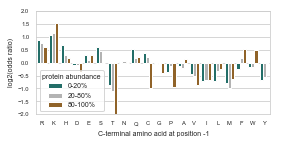

In [19]:
set_fontsize_paper()
width = 4.2
fig, ax = plt.subplots(figsize=(width, width/2.2))
ax = sns.barplot(ax=ax, data=plotDf, x=aaLabel, y=observable, hue='protein abundance',
                 order=aaTable, palette=paletteAbundanceCat)
ax.set_ylim(-2, 2)
ax.set_ylabel('log2(odds ratio)')
# plt.savefig(str(analysisAbundancePath / 'ncbiPax' / 'ncbiPax_prot_abundance_groups_cterminal{:d}_bias_barplot.png'.format(position)), dpi=300)

In [20]:
groupList = ['low (0-20%)', 'medium (20-80%)', 'high (80-100%)']

In [145]:
groupList = [re.sub(r'pc', r'%', g) for g in groupList]
groupList

['0-5%',
 '5-10%',
 '10-15%',
 '15-20%',
 '20-25%',
 '25-30%',
 '30-35%',
 '35-40%',
 '40-45%',
 '45-50%',
 '50-55%',
 '55-60%',
 '60-65%',
 '65-70%',
 '70-75%',
 '75-80%',
 '80-85%',
 '85-90%',
 '90-95%',
 '95-100%']

In [146]:
plotDf2 = oddsRatioAbundanceDf2.copy()
position = -1
observable = 'log2OddsRatio'
aaLabel = 'C-terminal amino acid at position {:d}'.format(position)
plotDf2.columns.name = aaLabel
plotDf2 = plotDf2.loc[idx['C', position, observable]].T#.stack()
for col in plotDf2.columns:
    plotDf2[col] = pd.to_numeric(plotDf2[col])
plotDf2 = plotDf2.loc[aaTable]
plotDf2.columns = groupList
plotDf2.head()

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  


,0-5%,5-10%,10-15%,15-20%,20-25%,25-30%,30-35%,35-40%,40-45%,45-50%,50-55%,55-60%,60-65%,65-70%,70-75%,75-80%,80-85%,85-90%,90-95%,95-100%
C-terminal amino acid at position -1,,,,,,,,,,,,,,,,,,,,
R,0.802018,0.634388,0.934182,1.131061,0.843787,0.738718,0.887949,0.764339,0.445920,0.786755,0.823039,0.488470,0.907929,0.842094,0.819334,0.628799,0.601145,0.755242,0.679606,0.354544
K,1.227310,0.870310,0.940869,1.182240,1.044859,1.153648,0.977100,1.037221,1.069011,1.111646,1.098796,1.199260,1.327841,1.158081,1.232211,1.278586,1.262902,1.334018,1.439767,1.914251
H,1.176615,0.573796,0.614339,0.104594,0.308951,0.697622,0.056409,0.254739,0.455320,-0.086857,0.222543,-0.316085,0.423096,0.345176,0.218537,0.551212,-0.050224,0.293148,0.398348,0.087015
D,-0.022739,-0.099067,-0.146091,-0.084926,0.101275,-0.453967,0.084182,-0.062228,-0.142030,-0.218537,-0.202223,0.092567,-0.143063,-0.337032,-0.214212,0.194637,-0.192944,-0.244868,-0.276401,-0.724178
E,0.643685,0.388182,0.311745,-0.153904,0.275128,-0.107403,-0.001155,0.005778,0.342896,-0.110103,-0.216301,0.293543,0.196186,-0.190978,0.331111,0.378208,0.321383,0.378175,0.330925,0.170808


In [150]:
ymax = 2.2

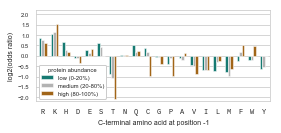

In [23]:
set_fontsize_paper()
width = 4.2
fig, ax = plt.subplots(figsize=(width, width/2.5))
plotDf2.plot.bar(ax=ax, width=0.65, color=list(paletteAbundanceCat.values()), alpha=1, linewidth=0.5)
ax.set_ylim(-ymax, ymax)
ax.set_yticks(np.arange(-2, 2.5, 0.5))
ax.set_ylabel('log2(odds ratio)')
ax.xaxis.grid(False)
ax.tick_params(axis='x', rotation=0)
legend = ax.legend(framealpha=1, title='protein abundance', fontsize='small')
plt.setp(legend.get_title(), fontsize='small')
family = 'Liberation Mono'
ticks_font = FontProperties(family=family, size='medium')
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
filename = 'ncbiPax_prot_abundance_groups_cterminal{:d}_bias_barplot'.format(position)
plt.savefig(analysisAbundancePath / 'ncbiPax' / (filename + '.png'), dpi=600, bbox_inches='tight')
plt.savefig(analysisAbundancePath / 'ncbiPax' / (filename + '.svg'), dpi=600, bbox_inches='tight')

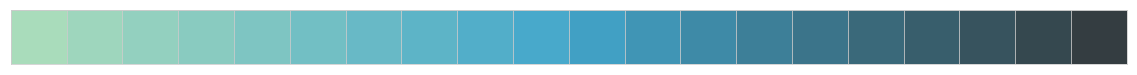

In [165]:
paletteAbundanceCat = sns.color_palette("GnBu_d", len(groupList))[::-1]
sns.palplot(paletteAbundanceCat)

In [157]:
plotDf2.max().max()

1.9142512232263171

In [158]:
plotDf2.min().min()

-2.8284058301191863

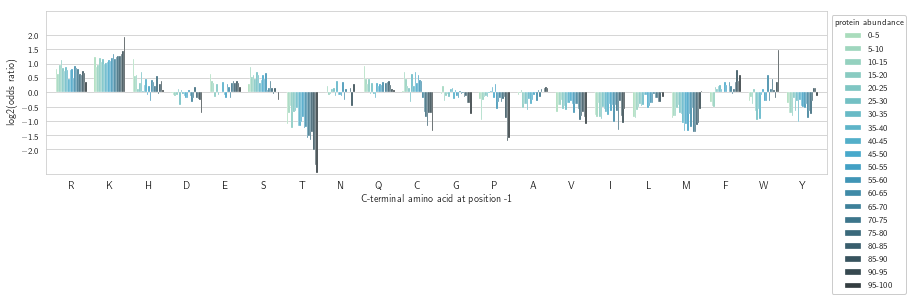

In [166]:
ymax = 2.85
set_fontsize_screen()
width = 14
fig, ax = plt.subplots(figsize=(width, 3))
plotDf2[:].plot.bar(ax=ax, width=0.8, color=paletteAbundanceCat, alpha=1, linewidth=0.3)
ax.set_ylim(-ymax, ymax)
ax.set_yticks(np.arange(-2, 2.5, 0.5))
ax.set_ylabel('log2(odds ratio)')
ax.xaxis.grid(False)
ax.tick_params(axis='x', rotation=0)
legend = ax.legend(framealpha=1, title='protein abundance', fontsize='small',
                   loc='upper left', bbox_to_anchor=(1, 1))
plt.setp(legend.get_title(), fontsize='small')
family = 'Liberation Mono'
ticks_font = FontProperties(family=family, size='medium')
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
filename = 'ncbiPax2_prot_abundance_groups_cterminal{:d}_bias_barplot'.format(position)
plt.savefig(analysisAbundancePath / 'ncbiPax2' / (filename + '.png'), dpi=600, bbox_inches='tight')
plt.savefig(analysisAbundancePath / 'ncbiPax2' / (filename + '.svg'), dpi=600, bbox_inches='tight')

In [ ]:
fontSizeLabels = FontProperties(size='small').get_size()

linewidth1 = 0.5
aspectratio = 1.5
figsize = (7, 3)
sns.set_style('whitegrid')

nmax = max(len(aaTable1), len(aaTable2))
nmax = max(plotData2['aa'].map(lambda x: x in aaTable1).sum(), plotData2['aa'].map(lambda x: x in aaTable2).sum())
print(nmax)
fig = plt.figure(figsize=figsize)
gsOuter = gridspec.GridSpec(2, 1, height_ratios = [1, 1])

axes = []
# for i, codon in enumerate(codonList):
for i, aaTable9 in enumerate([aaTable1, aaTable2]):

    gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsOuter[i])
    ax = fig.add_subplot(gs[0, 0])
    axes.append(ax)
    ax.set_facecolor(colorBackground1)
    plotData4 = plotData2[plotData2['aa'].map(lambda x: x in aaTable9)].drop('aa', axis=1)
    maskData4 = maskData
    maskData4.index = [re.sub('T', 'U', c) for c in maskData4.index]
    maskData4 = maskData.loc[plotData4.index.map(lambda x: x[2:])]
    maskData4.index = plotData4.index
    maskData4.columns = [re.sub('T', 'U', c) for c in maskData4.columns]
    maskData4 = maskData4[plotData4.columns]
    print(len(plotData4), nmax)
    if len(plotData4) < nmax:
        ndummy = nmax - len(plotData4)
        s = plotData4.iloc[:ndummy, :].copy()
        s.iloc[:] = np.nan
        s.index = ndummy*['']
        plotData4 = pd.concat([plotData4, s])
        s = maskData4.iloc[:ndummy, :].copy()
        s.iloc[:] = True
        s.index = ndummy*['']
        maskData4 = pd.concat([maskData4, s])
        print(len(plotData4), nmax)
    plotData4 = plotData4.T
    maskData4 = maskData4.T

    # Create axes for the colorbar for more precise positioning
    # vertical bar
    cbar_aspect = 1
    cbar_length = 0.4
    cbarLabel = '$\log_2$(odds ratio)'
    ax = seaborn.heatmap(plotData4, square=True, mask=maskData4, ax=ax, cmap=cmap,
                         cbar=True, vmin=-vmax, vmax=vmax, cbar_kws={"label":cbarLabel, 'aspect':15},
                         xticklabels=True, yticklabels=True,
                         linewidth=linewidth1, linecolor=colorHeatmapLine)
    cbar_ax = fig.axes[-1]
    cbar_ax.set_position([1.2, 0.5 - cbar_length, cbar_length/cbar_aspect, cbar_length])
    tickLength = FontProperties(size='small').get_size()/4
#         cbar_ax.xaxis.set_ticks([-vmax, 0, vmax1])
    cbar_ax.tick_params(axis='y', length=tickLength, color=colorAxis, labelsize='small')
    if i == 1:
        ax.set_xlabel('codon at position -1 (C-terminal)')
    family = 'Liberation Mono'
    ticks_font = FontProperties(family=family, size=fontSizeLabels)
    ax.set_ylabel('stop codon\ncontext')
    ax.tick_params(which='y', left=True, labelleft=True)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(ticks_font)
        tick.set_bbox(dict(pad=0, facecolor='none', edgecolor='none'))
#     stopCodonIndex = plotData4.columns.get_level_values(0)
#     tform = transforms.blended_transform_factory(ax.transData, ax.transAxes)
#     for yi, stopCodon in enumerate(stopCodonIndex):
#         ax.annotate(stopCodon, xy=(yi + 0.5, 1.0), xycoords=tform,
#                     xytext=(0, 6), textcoords='offset points', ha='center', va='bottom',
#                     rotation=90, bbox=dict(pad=0, facecolor='none', edgecolor='none'),
#                     fontproperties=FontProperties(family=family, size=fontSizeLabels))
#     ax.tick_params(labelbottom=False)
#     ax.annotate(codon, xy=(0.5, 0.0), xycoords='axes fraction',
#                 xytext=(0, -6), textcoords='offset points', ha='center', va='top',
#                 rotation=0, bbox=dict(pad=0, facecolor='none', edgecolor='none'),
#                 fontproperties=FontProperties(family=family, size=fontSizeLabels))


# ax.annotate('codon at ' + terminus + '-terminal', xy=(0.5, 0.06), xycoords='figure fraction', ha='center', va='top')
# ax.annotate('stop codon context', xy=(0.5, 0.95), xycoords='figure fraction', ha='center', va='bottom')

title = terminus + '-terminal, ' + speciesSetName
axes[0].set_title(title)
filenamePlot = outputFilePrefix + '_composition_bias_codon_' + terminus + 'terminal_stopCodonContext_heatmap'
print(filenamePlot)
outputPath = Path(plotsFolder) / speciesSetName
fig.savefig(outputPath / (filenamePlot + ".png"), dpi=500, bbox_inches="tight")
fig.savefig(outputPath / (filenamePlot + ".svg"), dpi=500, bbox_inches="tight")

In [24]:
plotDf2 = oddsRatioAbundanceDf2.copy()
position = -3
observable = 'log2OddsRatio'
aaLabel = 'C-terminal amino acid at position {:d}'.format(position)
plotDf2.columns.name = aaLabel
plotDf2 = plotDf2.loc[idx['C', position, observable]].T
for col in plotDf2.columns:
    plotDf2[col] = pd.to_numeric(plotDf2[col])
plotDf2 = plotDf2.loc[aaTable]
plotDf2.columns = groupList
plotDf2.head()

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  


,low (0-20%),medium (20-80%),high (80-100%)
C-terminal amino acid at position -3,,,
R,0.375434,0.413484,0.261376
K,0.832584,0.731182,0.754704
H,0.204574,-0.013958,-0.357266
D,-0.322651,-0.347009,-0.618522
E,0.621834,0.311215,0.276488


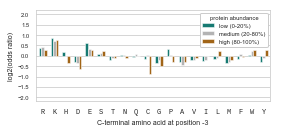

In [25]:
set_fontsize_paper()
width = 4.2
fig, ax = plt.subplots(figsize=(width, width/2.5))
plotDf2.plot.bar(ax=ax, width=0.65, color=list(paletteAbundanceCat.values()), alpha=1, linewidth=0.5)
ax.set_ylim(-ymax, ymax)
ax.set_yticks(np.arange(-2, 2.5, 0.5))
ax.set_ylabel('log2(odds ratio)')
ax.xaxis.grid(False)
ax.tick_params(axis='x', rotation=0)
legend = ax.legend(framealpha=1, title='protein abundance', fontsize='small')
plt.setp(legend.get_title(), fontsize='small')
family = 'Liberation Mono'
ticks_font = FontProperties(family=family, size='medium')
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
filename = 'ncbiPax_prot_abundance_groups_cterminal{:d}_bias_barplot'.format(position)
plt.savefig(analysisAbundancePath / 'ncbiPax' / (filename + '.png'), dpi=600, bbox_inches='tight')
plt.savefig(analysisAbundancePath / 'ncbiPax' / (filename + '.svg'), dpi=600, bbox_inches='tight')

### Bulk frequency

Is the bulk composition of abundant proteins different from the one of lowly abundant proteins? This can also influence the resulting c-terminal bias.

In [77]:
oddsRatioAbundanceDf2.head()

A  \
terminus position from terminus observable        protein abundance                          
C        -20                    BH_multiple_tests 0-20%                               True   
                                count             0-20%                                439   
                                log2OddsRatio     0-20%               -0.23622602540627372   
                                oddsRatio         0-20%                 0.8489632299148081   
                                pvalue            0-20%              0.0008509763584941745   

                                                                                       C  \
terminus position from terminus observable        protein abundance                        
C        -20                    BH_multiple_tests 0-20%                            False   
                                count             0-20%                               61   
                                log2OddsRatio     0-20%              0.06401188023033655   
                                oddsRatio         0-20%               1.0453687085177725   
                                pvalue            0-20%                0.692593277006282   

                                                                                        D  \
terminus position from terminus observable        protein abundance                         
C        -20                    BH_multiple_tests 0-20%                             False   
                                count             0-20%                               251   
                                log2OddsRatio     0-20%              -0.09620040316120763   
                                oddsRatio         0-20%                0.9354935404397725   
                                pvalue            0-20%               0.31470862810494726   

                                                                                        E  \
terminus position from terminus observable        protein abundance                         
C        -20                    BH_multiple_tests 0-20%                             False   
                                count             0-20%                               331   
                                log2OddsRatio     0-20%               0.17973131481034726   
                                oddsRatio         0-20%                1.1326729184800546   
                                pvalue            0-20%              0.030602109046166375   

                                                                                       F  \
terminus position from terminus observable        protein abundance                        
C        -20                    BH_multiple_tests 0-20%                            False   
                                count             0-20%                              217   
                                log2OddsRatio     0-20%              -0.0695557399801237   
                                oddsRatio         0-20%                0.952931396255723   
                                pvalue            0-20%               0.5187853636689875   

                                                                                        G  \
terminus position from terminus observable        protein abundance                         
C        -20                    BH_multiple_tests 0-20%                             False   
                                count             0-20%                               357   
                                log2OddsRatio     0-20%               -0.1887219554511381   
                                oddsRatio         0-20%                 0.877382626703806   
                                pvalue            0-20%              0.016977555508776658   

                                                                                       H  \
terminus position from terminus observable        protein abundance                        


In [225]:
plotDf2 = oddsRatioAbundanceDf2.copy()
position = 0
observable = 'count'
aaLabel = 'amino acid'
plotDf2.columns.name = aaLabel
plotDf2 = plotDf2.loc[idx['bulk', position, observable]].T
for col in plotDf2.columns:
    plotDf2[col] = pd.to_numeric(plotDf2[col])
plotDf2 = plotDf2.loc[aaTable]
plotDf2.columns = groupList
plotDf2.head()

/home/mweber/.local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  


,low (0-20%),medium (20-80%),high (80-100%)
amino acid,,,
R,87555,267065,78898
K,65630,243984,90177
H,34707,105310,29579
D,77814,268654,90147
E,85640,318478,111189


In [226]:
countTot = plotDf2.sum(axis=0)
print(countTot)
plotDf3 = plotDf2 / countTot
plotDf3.head()

low (0-20%)        1567924
medium (20-80%)    4857827
high (80-100%)     1523428
dtype: int64


,low (0-20%),medium (20-80%),high (80-100%)
amino acid,,,
R,0.055841,0.054976,0.051790
K,0.041858,0.050225,0.059193
H,0.022136,0.021678,0.019416
D,0.049629,0.055303,0.059174
E,0.054620,0.065560,0.072986


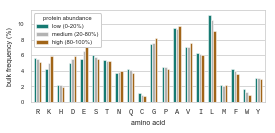

In [228]:
set_fontsize_paper()
width = 4.2
fig, ax = plt.subplots(figsize=(width, width/2.5))
(100*plotDf3).plot.bar(ax=ax, width=0.65, color=list(paletteAbundanceCat.values()), linewidth=0.5)
ax.set_ylabel('bulk frequency (%)')
ax.xaxis.grid(False)
ax.tick_params(axis='x', rotation=0)
legend = ax.legend(framealpha=1, title='protein abundance', fontsize='small')
plt.setp(legend.get_title(), fontsize='small')
family = 'Liberation Mono'
ticks_font = FontProperties(family=family, size='medium')
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
# plt.tight_layout()
filename = 'ncbiPax_prot_abundance_groups_bulk_aa_frequency_barplot'
plt.savefig(analysisAbundancePath / 'ncbiPax' / (filename + '.png'), dpi=600, bbox_inches='tight')
plt.savefig(analysisAbundancePath / 'ncbiPax' / (filename + '.svg'), dpi=600, bbox_inches='tight')

The bulk frequency of Thr is the same, while the bulk frequency of Lys moderately increases with protein abundance (0.69% absolute difference, 15% relative difference in frequency between the low and the high groups). This means that the enrichment of Lys at C-terminal for highly abundant proteins would be even stronger if we would compare with the bulk amino acid frequency among all sequences. The bulk frequency of threonine remains roughly the same (0.24% absolute difference, 4.4% relative difference).

We don't know which are the biological consequences of this change of frequency.

In [241]:
f0 = plotDf3.loc['K'].iloc[0]
f2 = plotDf3.loc['K'].iloc[2]
(f2 - f0)/f0

0.14562203495814466

Absolute difference in frequency.

In [244]:
plotDf3.apply(lambda f: (f['80-100%'] - f['0-20%']), axis=1)

amino acid
R   -0.000539
K    0.006939
H   -0.002069
D    0.008169
E    0.014183
S   -0.013032
T   -0.002428
N   -0.002287
Q   -0.003752
C   -0.006286
G    0.013323
P   -0.001993
A    0.014278
V    0.008342
I   -0.003513
L   -0.013713
M   -0.000946
F   -0.007274
W   -0.005681
Y   -0.001720
dtype: float64

Relative difference in frequency.

In [243]:
plotDf3.apply(lambda f: (f['80-100%'] - f['0-20%'])/f['0-20%'], axis=1)

amino acid
R   -0.009633
K    0.145622
H   -0.091468
D    0.160070
E    0.245806
S   -0.195452
T   -0.043887
N   -0.057483
Q   -0.089704
C   -0.460271
G    0.194217
P   -0.042799
A    0.165894
V    0.122554
I   -0.056693
L   -0.129676
M   -0.041718
F   -0.170602
W   -0.372591
Y   -0.056936
dtype: float64